In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [3]:
df_train = pd.read_csv("C:/Users/KOUSHA/Desktop/data/House Price Prediction dataset/train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test = pd.read_csv("C:/Users/KOUSHA/Desktop/data/House Price Prediction dataset/test.csv")
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<AxesSubplot:>

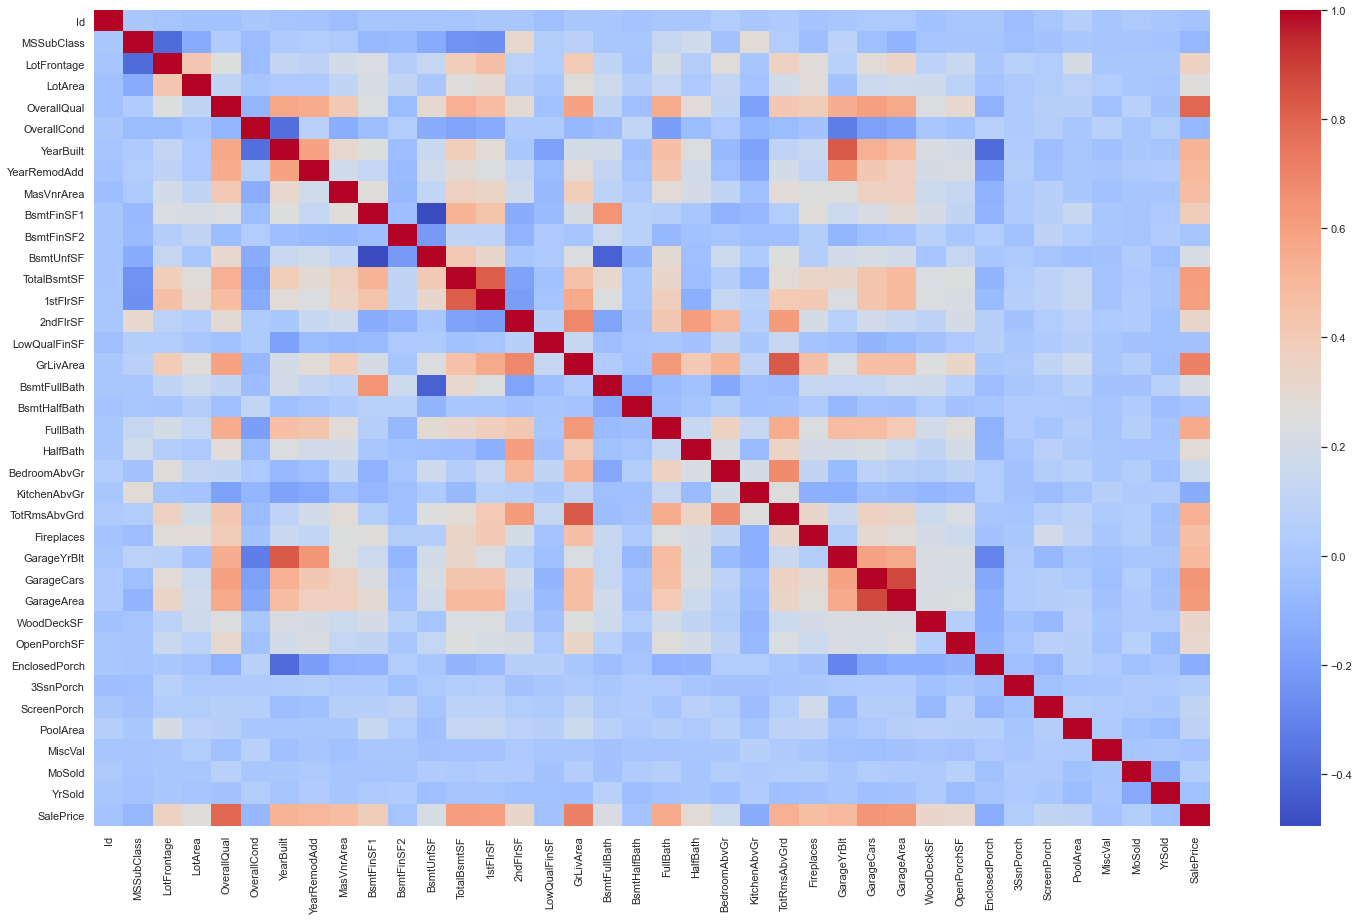

In [6]:
sns.set(rc={'figure.figsize':(25,15)})
sns.heatmap(df_train.corr(), fmt = '.1g', cmap = 'coolwarm')

In the above heatmap we can see that the variables - LotFrontage, OverallQual, YearBuilt, YearRemodAdd, MasVnrArea,
    TotalbsmtSF, 1stFirSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea are highly correlated to SalePrice.

# Dealing with Continous Variables

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

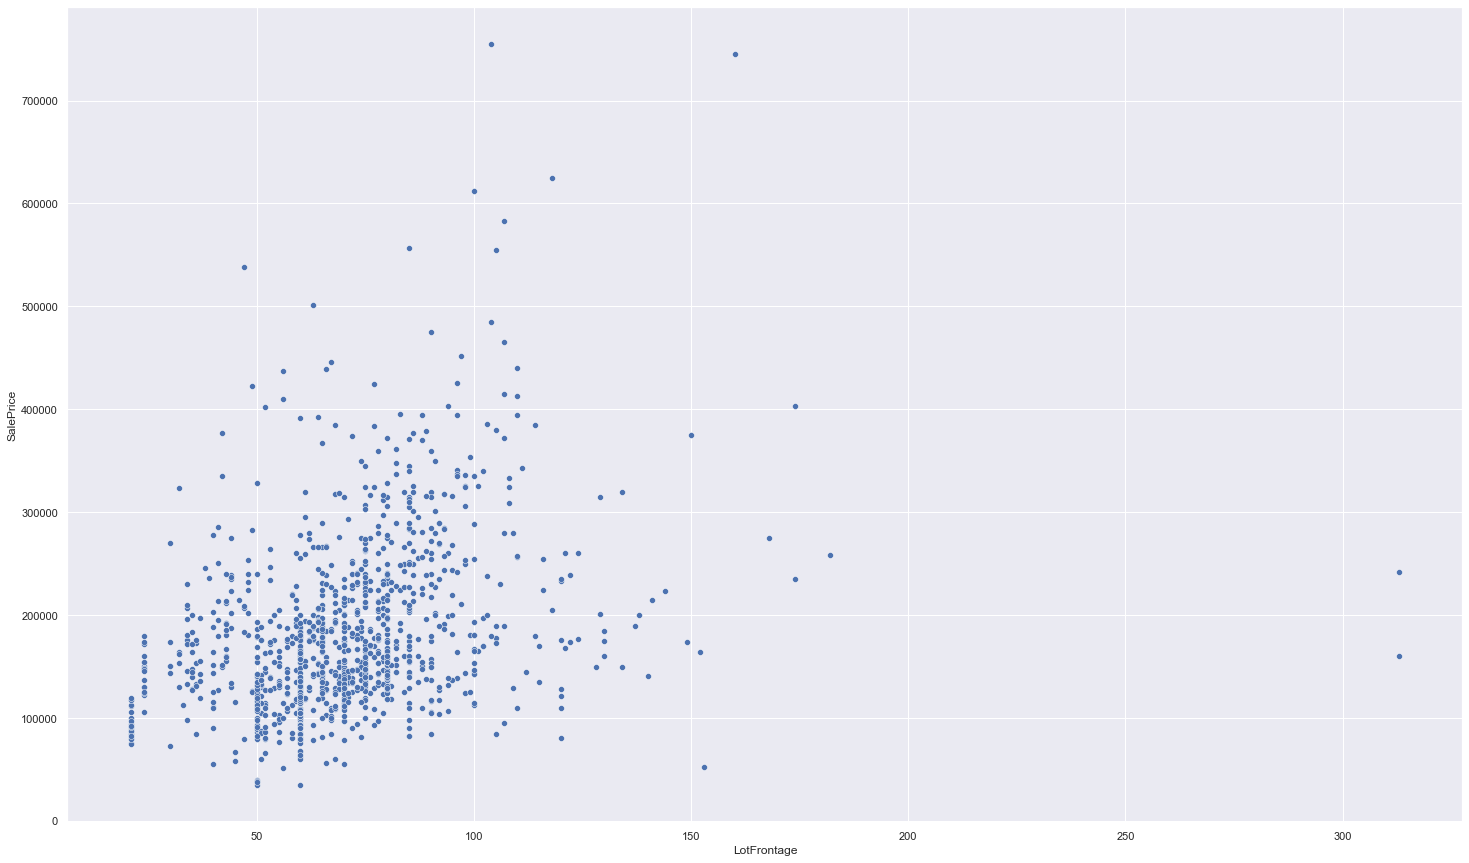

In [7]:
sns.scatterplot(x = 'LotFrontage', y = 'SalePrice', data = df_train)

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

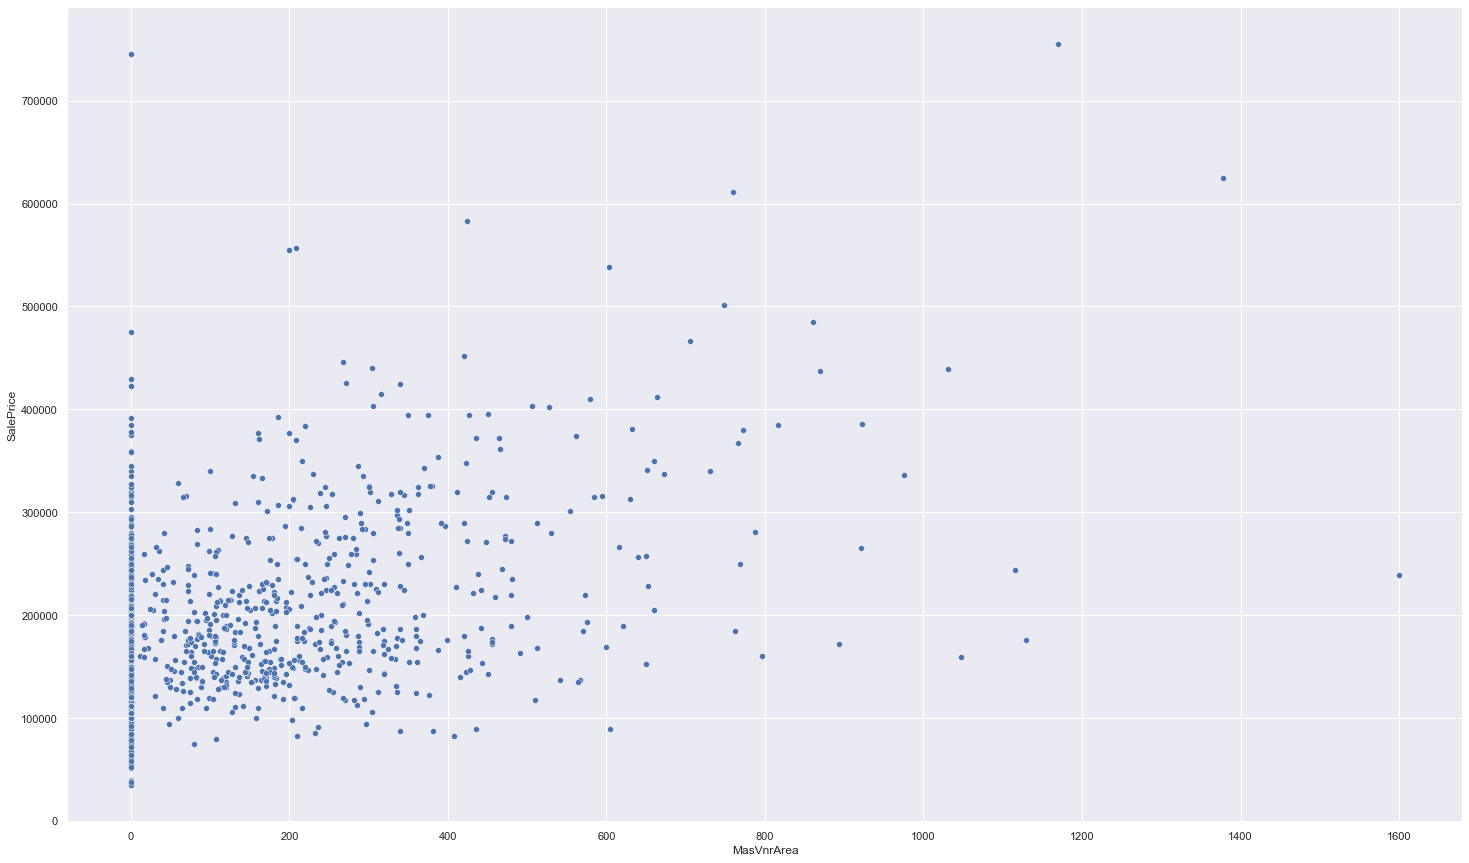

In [8]:
sns.scatterplot(x = 'MasVnrArea', y = 'SalePrice', data = df_train)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

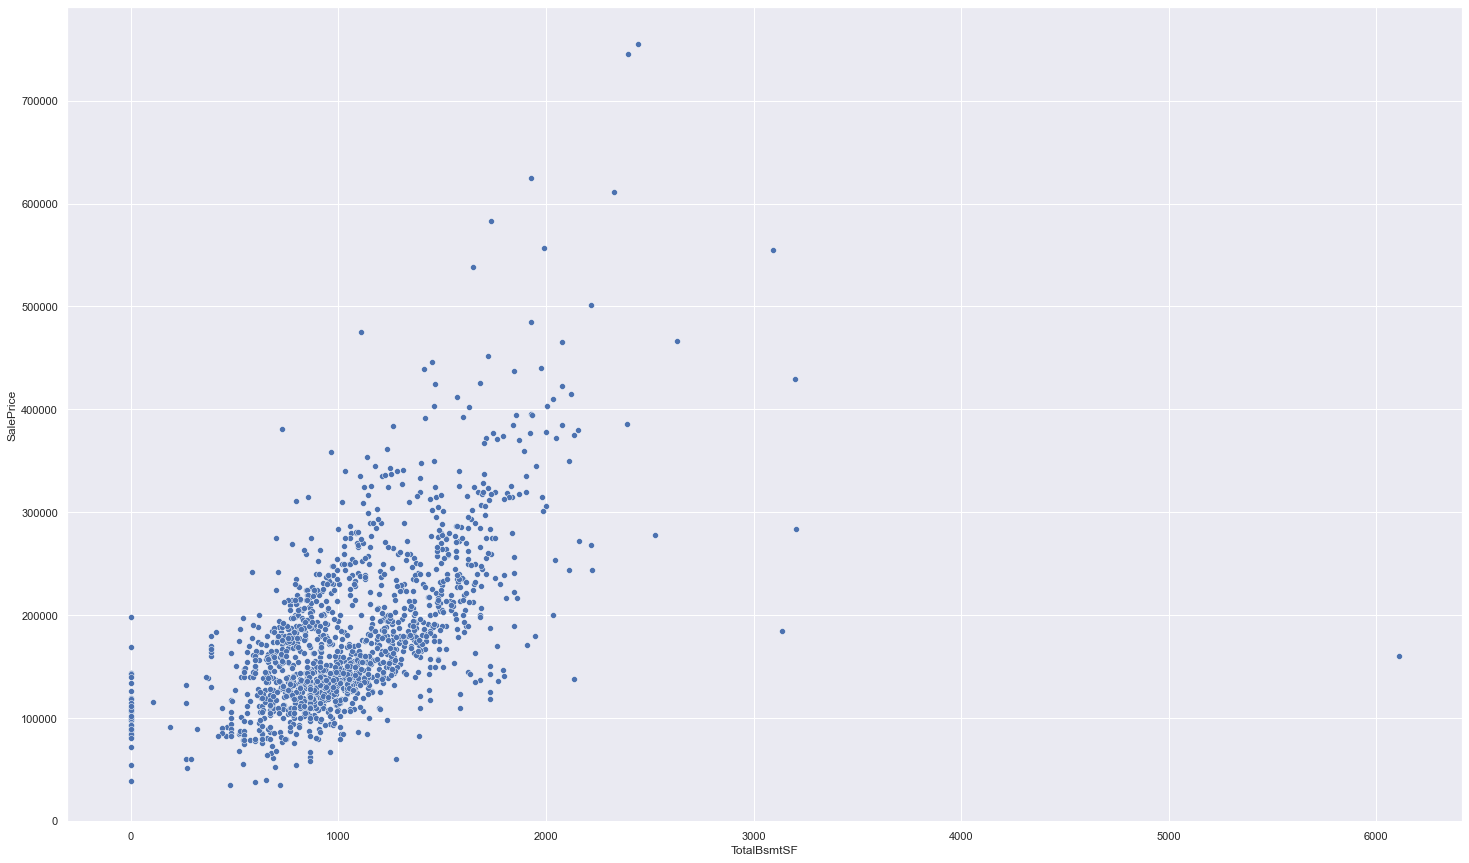

In [9]:
sns.scatterplot(x = 'TotalBsmtSF', y = 'SalePrice', data = df_train)

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

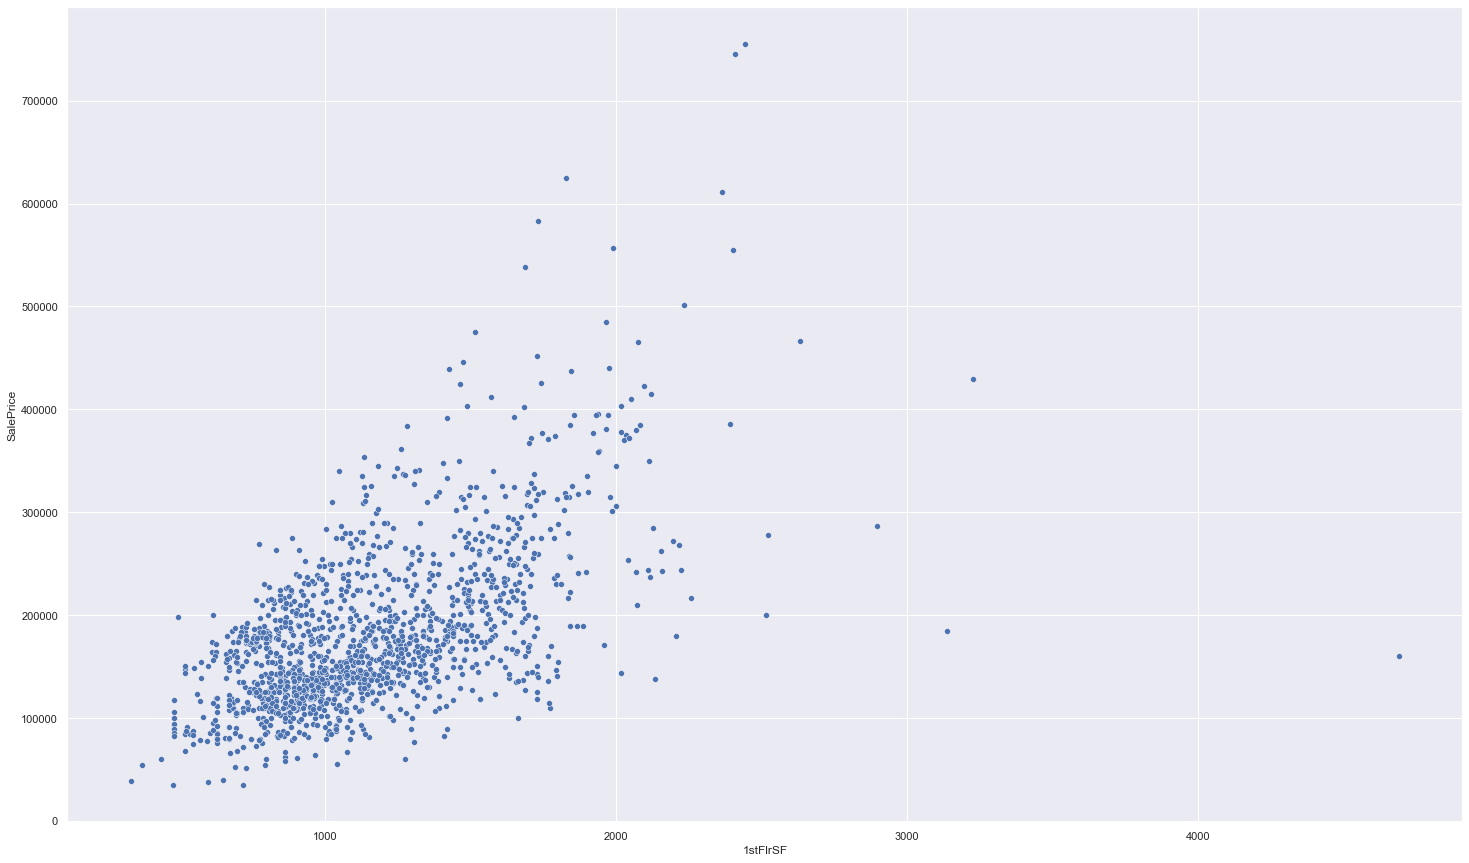

In [10]:
sns.scatterplot(x = '1stFlrSF', y = 'SalePrice', data = df_train)

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

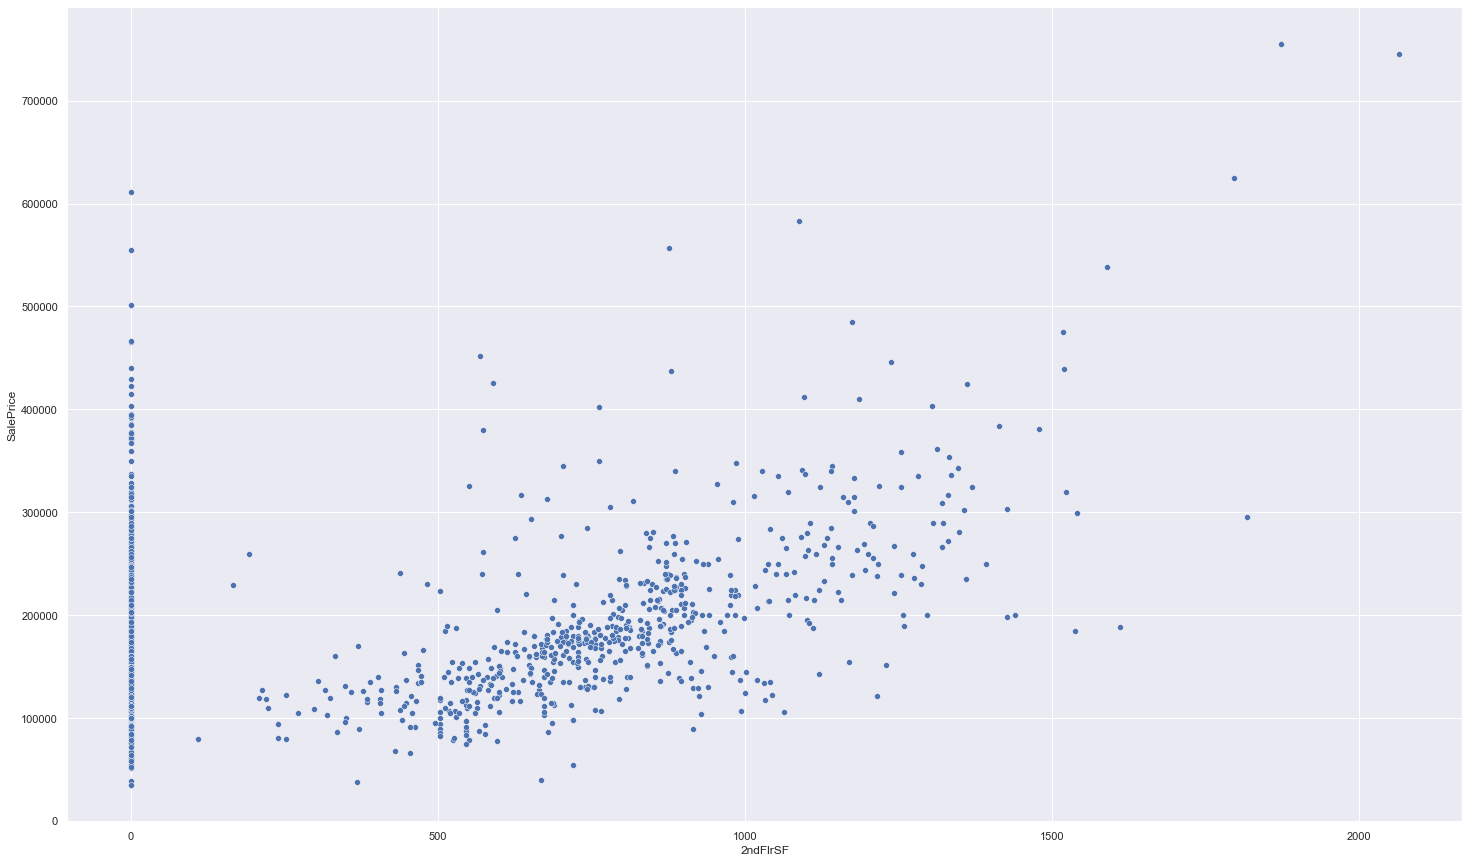

In [11]:
sns.scatterplot(x = '2ndFlrSF', y = 'SalePrice', data = df_train)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

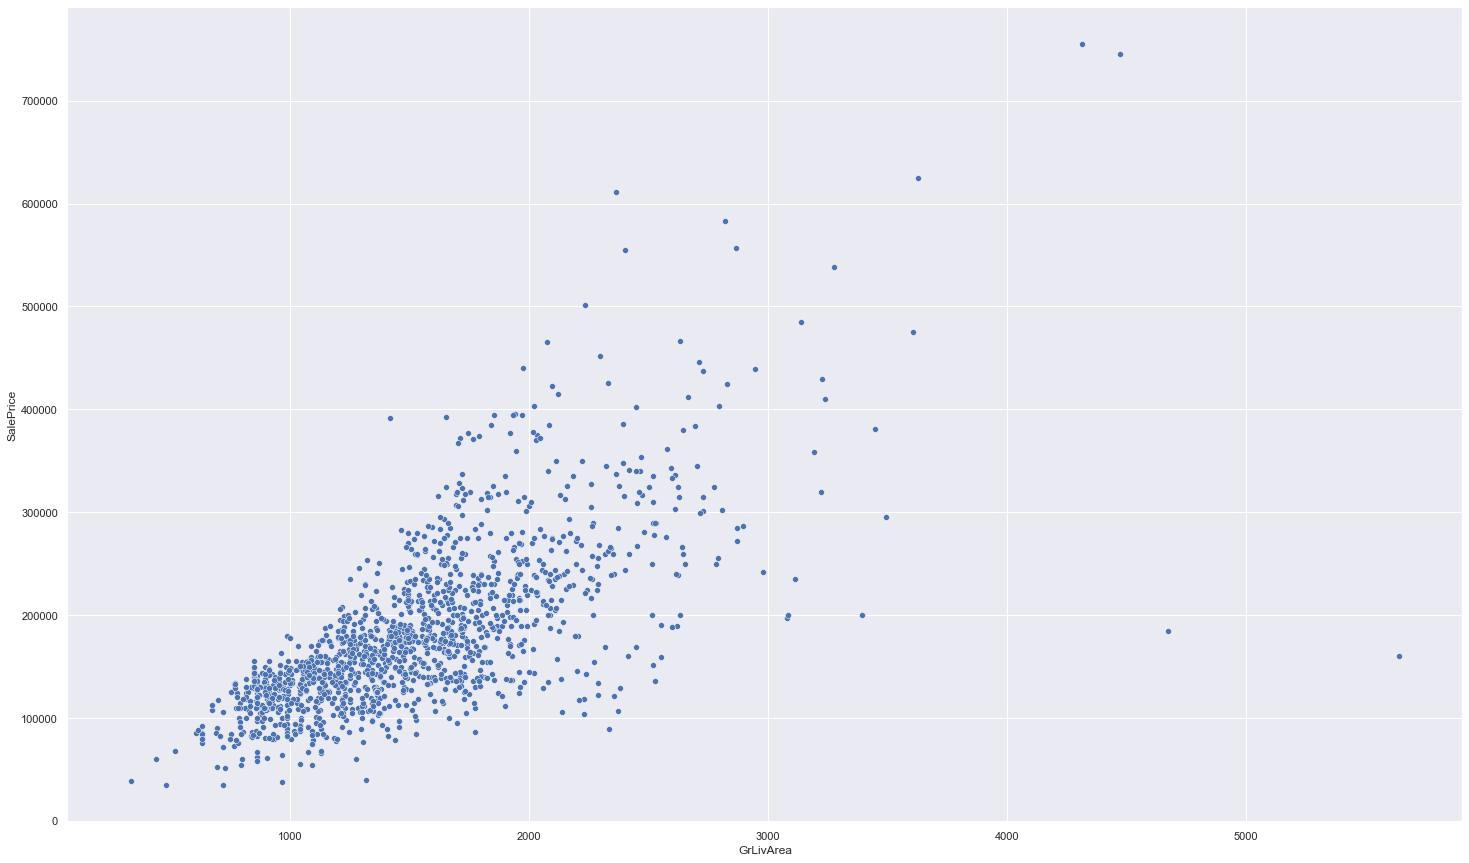

In [12]:
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = df_train)

# Dealing with the Categorical Variables
this dataset is consist of many categorical variable some of them are Ordinal and some are Nominal. 

In [13]:
df_train.MSSubClass.unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [14]:
df_train['MSSubClass'].value_counts().sort_values(ascending = False).head(15)

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

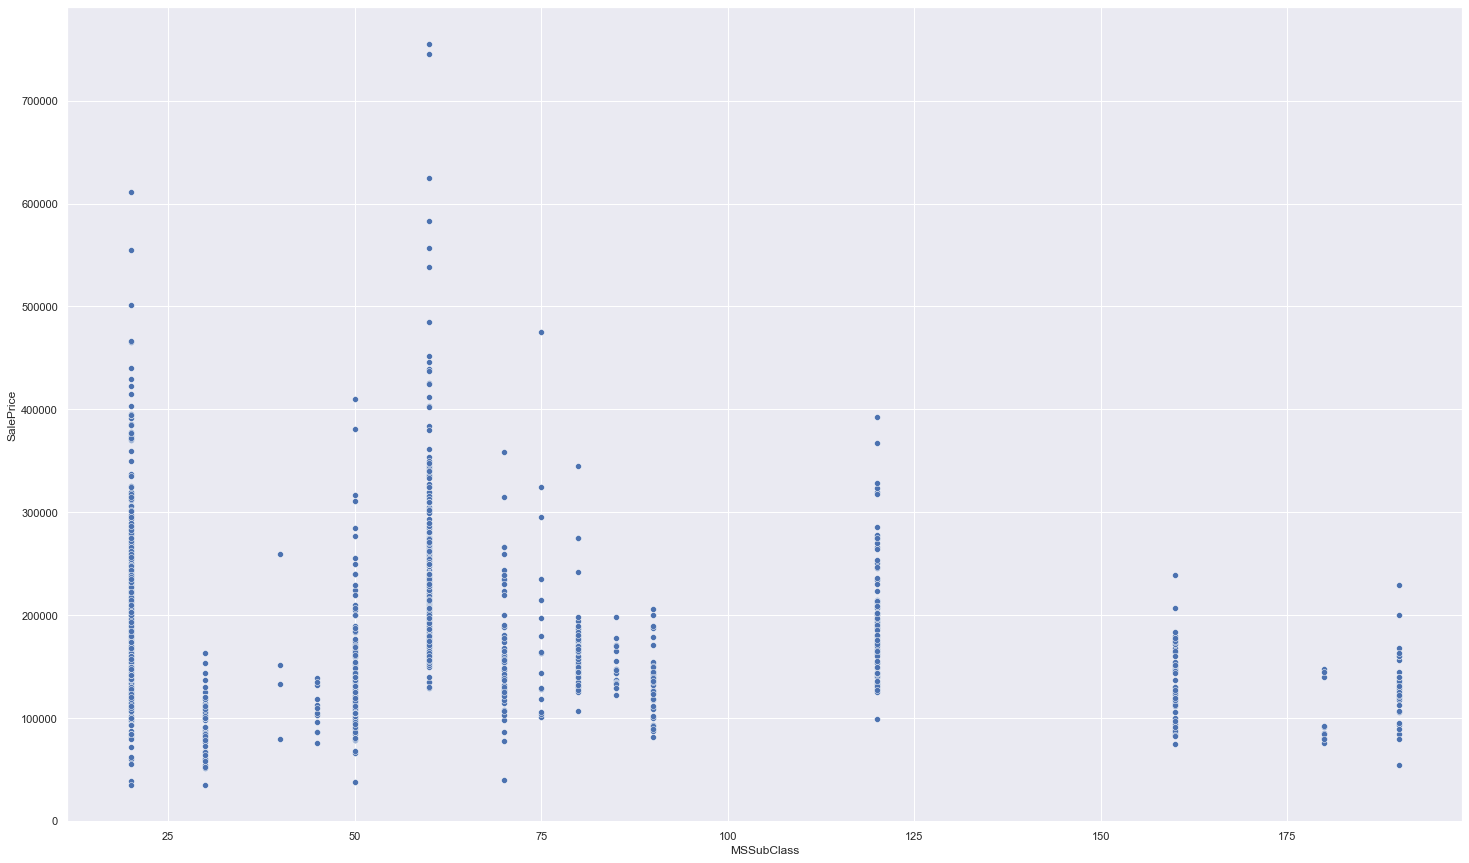

In [15]:
sns.scatterplot(x = 'MSSubClass', y = 'SalePrice', data = df_train)

In [16]:
df_train.MSZoning.value_counts().sort_values(ascending = False).head()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

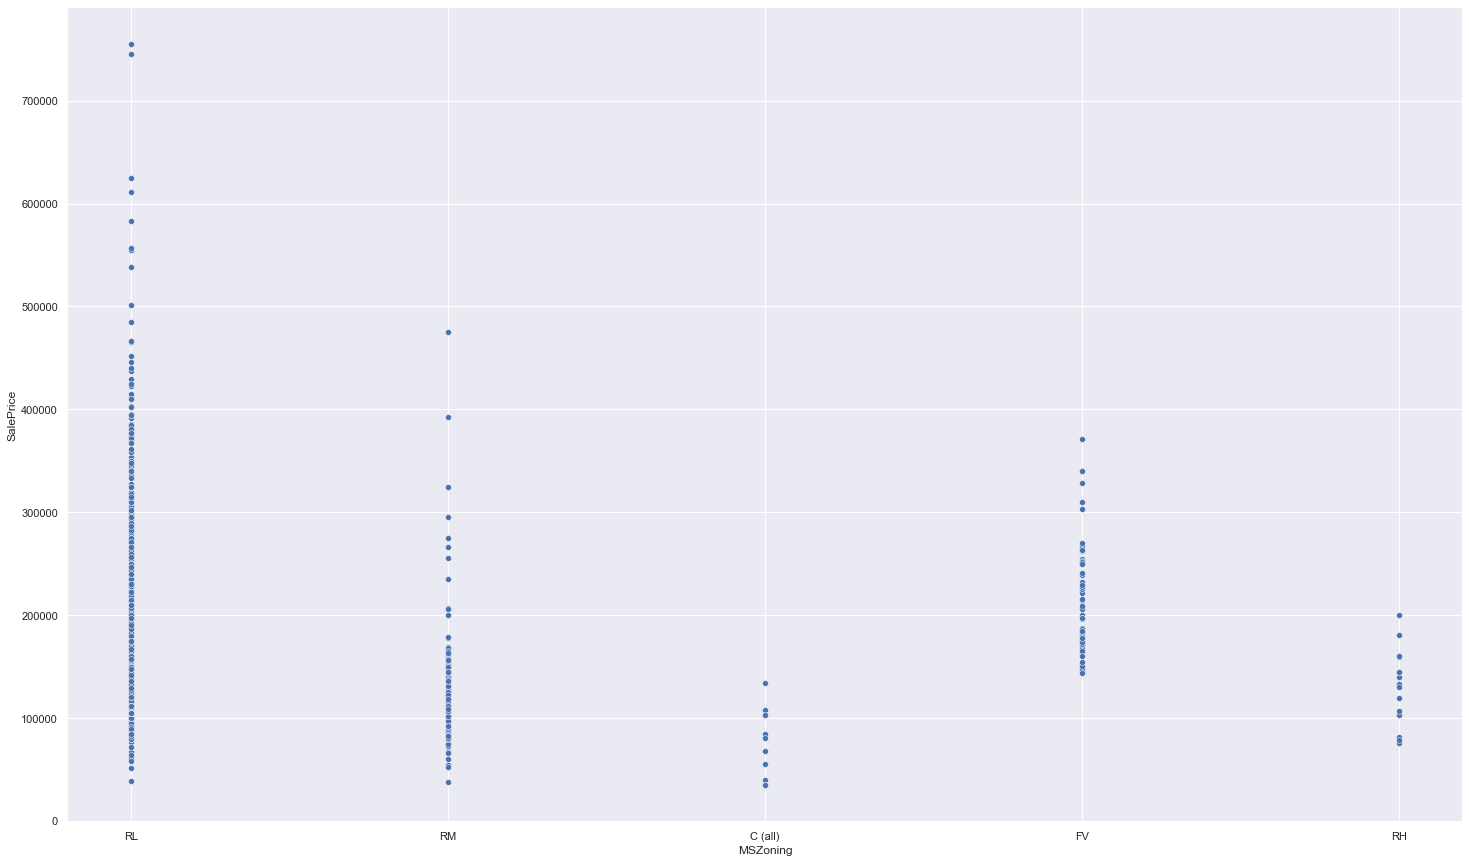

In [17]:
sns.scatterplot(x = 'MSZoning', y = 'SalePrice', data = df_train)

In [18]:
df_train.Street.value_counts().sort_values(ascending = False).head()

Pave    1454
Grvl       6
Name: Street, dtype: int64

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

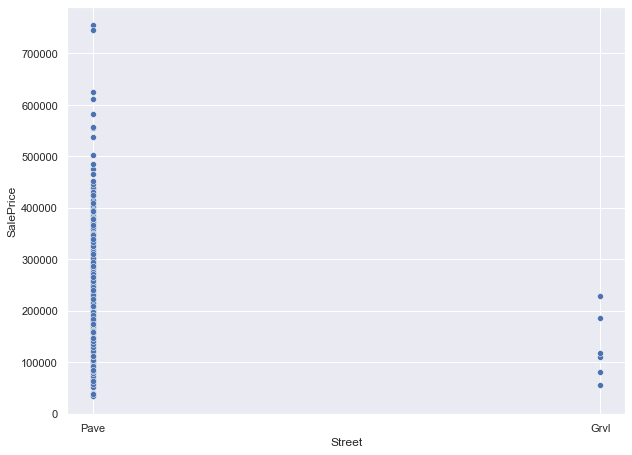

In [19]:
sns.set(rc={'figure.figsize':(10,7.5)})
sns.scatterplot(x = 'Street', y = 'SalePrice', data = df_train)

In [20]:
df_train.LotShape.value_counts().sort_values(ascending = False).head()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

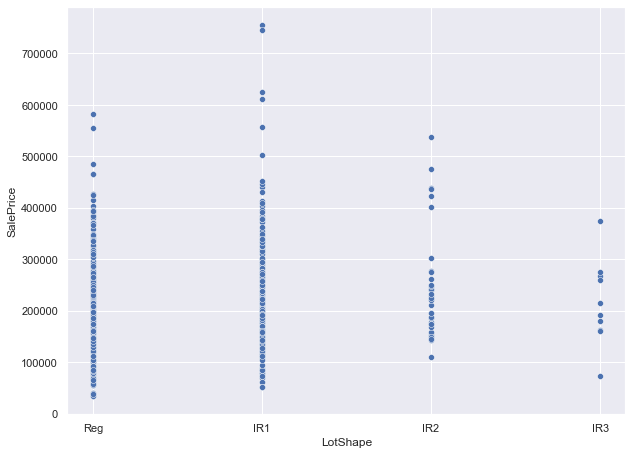

In [21]:
sns.scatterplot(x = 'LotShape', y = 'SalePrice', data = df_train)

In [22]:
df_train.LandContour.value_counts().sort_values(ascending = False).head()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

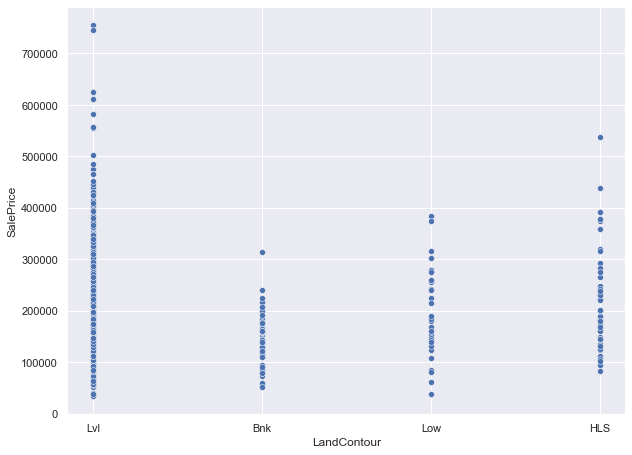

In [23]:
sns.scatterplot(x = 'LandContour', y = 'SalePrice', data = df_train)

In [24]:
df_train.Utilities.value_counts().sort_values(ascending = False).head()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

<AxesSubplot:xlabel='Utilities', ylabel='SalePrice'>

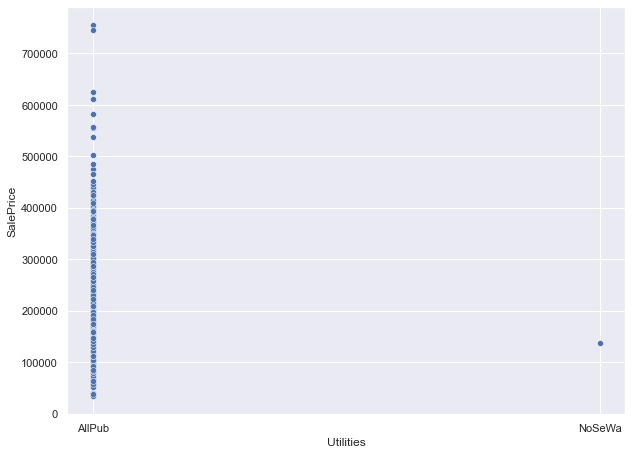

In [25]:
sns.scatterplot(x = 'Utilities', y = 'SalePrice', data = df_train)

In [26]:
df_train.LotConfig.value_counts().sort_values(ascending = False).head()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

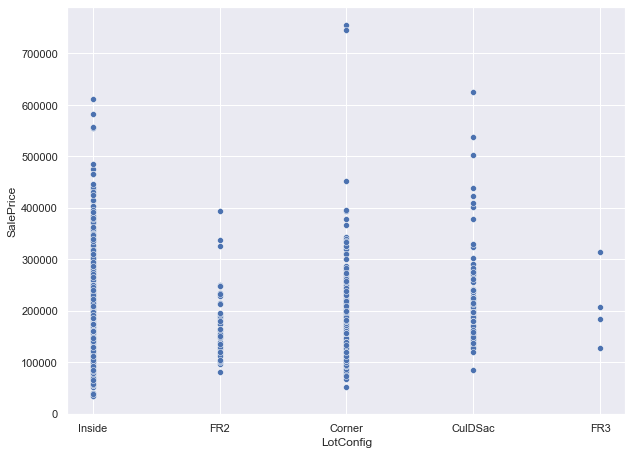

In [27]:
sns.scatterplot(x = 'LotConfig', y = 'SalePrice', data = df_train)

In [28]:
df_train.LandSlope.value_counts().sort_values(ascending = False).head()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

<AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>

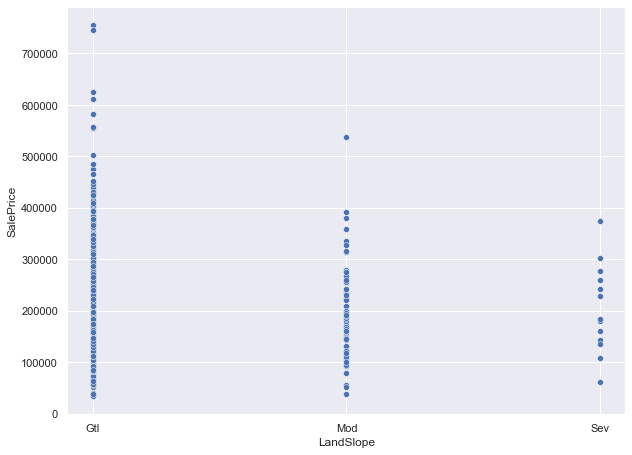

In [29]:
sns.scatterplot(x = 'LandSlope', y = 'SalePrice', data = df_train)

In [30]:
df_train[['LandContour','LandSlope']].head(10)

,LandContour,LandSlope
0,Lvl,Gtl
1,Lvl,Gtl
2,Lvl,Gtl
3,Lvl,Gtl
4,Lvl,Gtl
5,Lvl,Gtl
6,Lvl,Gtl
7,Lvl,Gtl
8,Lvl,Gtl
9,Lvl,Gtl


In [31]:
df_train.Neighborhood.value_counts().sort_values(ascending = False).head(20)

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Name: Neighborhood, dtype: int64

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

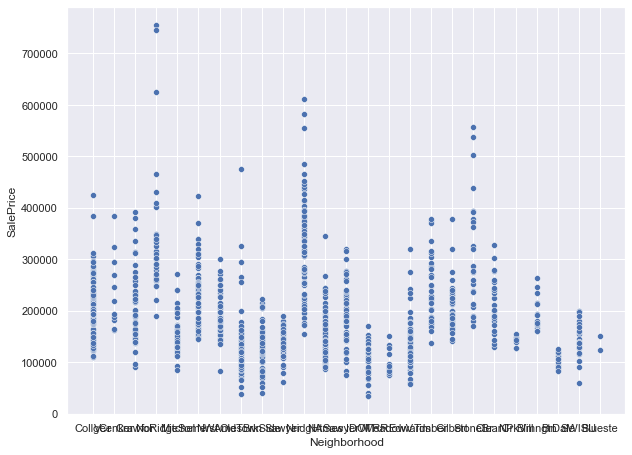

In [32]:
sns.scatterplot(x = 'Neighborhood', y = 'SalePrice', data = df_train)

In [33]:
df_train.Condition1.value_counts().sort_values(ascending = False).head(20)

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

<AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>

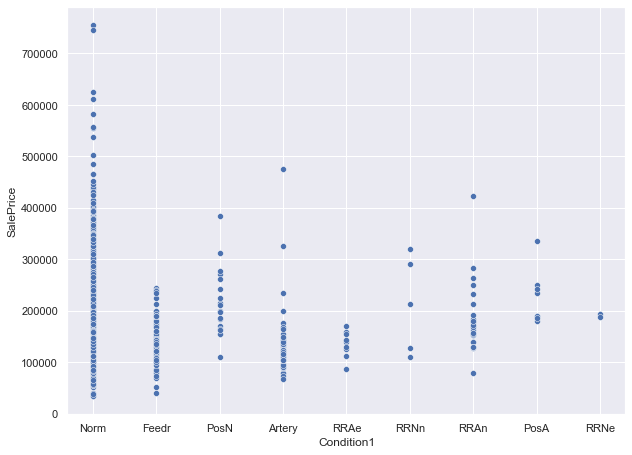

In [34]:
sns.scatterplot(x = 'Condition1', y = 'SalePrice', data = df_train)

In [35]:
df_train.Condition2.value_counts().sort_values(ascending = False).head(20)

Norm      1445
Feedr        6
PosN         2
Artery       2
RRNn         2
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64

In [36]:
df_train.BldgType.value_counts().sort_values(ascending = False).head(20)

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

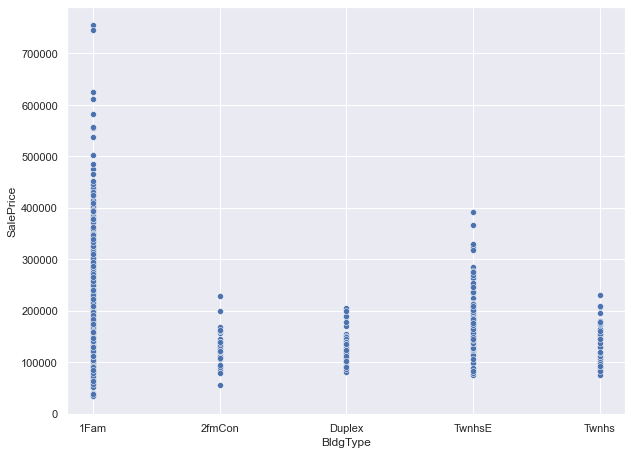

In [37]:
sns.scatterplot(x = 'BldgType', y = 'SalePrice', data = df_train)

In [38]:
df_train.HouseStyle.value_counts().sort_values(ascending = False).head(20)

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

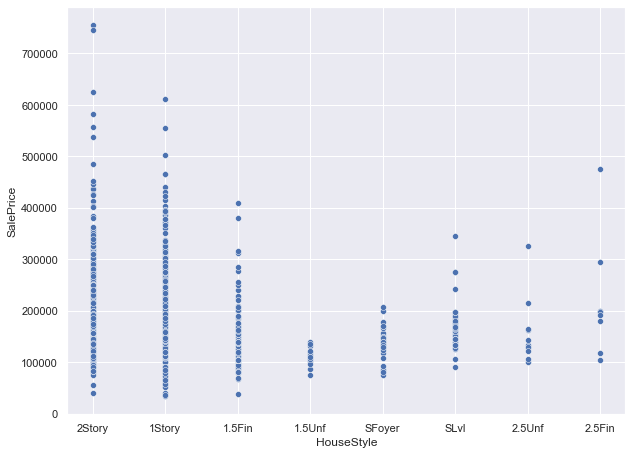

In [39]:
sns.scatterplot(x = 'HouseStyle', y = 'SalePrice', data = df_train)

In [40]:
df_train.OverallQual.value_counts().sort_values(ascending = False).head(20)

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

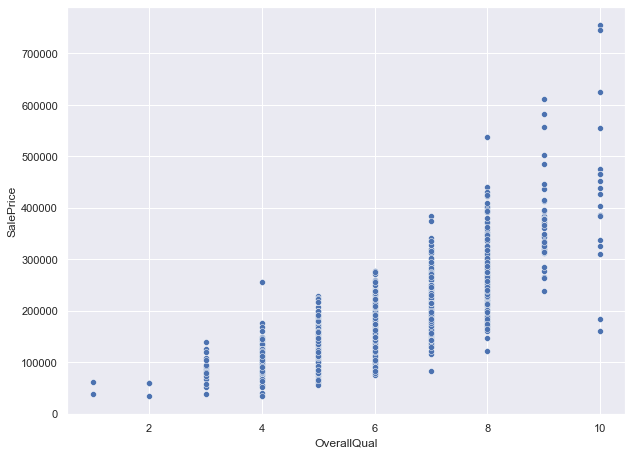

In [41]:
sns.scatterplot(x = 'OverallQual', y = 'SalePrice', data = df_train)

In [42]:
df_train.OverallCond.value_counts().sort_values(ascending = False).head(20)

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

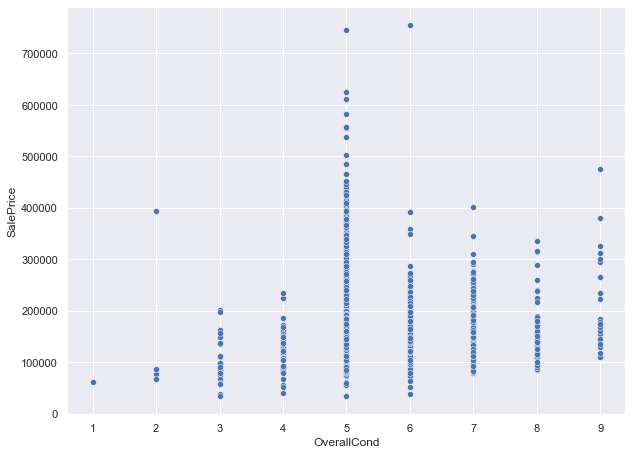

In [43]:
sns.scatterplot(x = 'OverallCond', y = 'SalePrice', data = df_train)

In [44]:
df_train.RoofStyle.value_counts().sort_values(ascending = False).head(20)

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

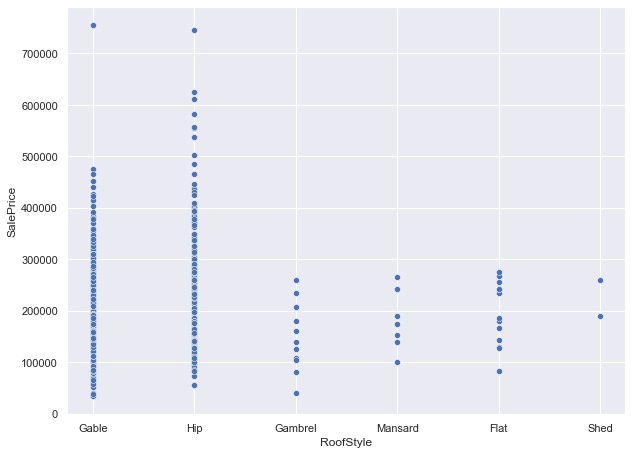

In [45]:
sns.scatterplot(x = 'RoofStyle', y = 'SalePrice', data = df_train)

In [46]:
df_train.RoofMatl.value_counts().sort_values(ascending = False).head(20)

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Metal         1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [47]:
df_train.Exterior1st.value_counts().sort_values(ascending = False).head(20)

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64

In [48]:
df_train.Condition1.value_counts().sort_values(ascending = False).head(20)

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [49]:
df_train.Condition2.value_counts().sort_values(ascending = False).head(20)

Norm      1445
Feedr        6
PosN         2
Artery       2
RRNn         2
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64

In [50]:
df_train.Exterior1st.value_counts().sort_values(ascending = False).head(20)

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64

In [51]:
df_train.Exterior2nd.value_counts().sort_values(ascending = False).head(20)

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [52]:
df_train.MasVnrType.value_counts().sort_values(ascending = False).head(20)

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

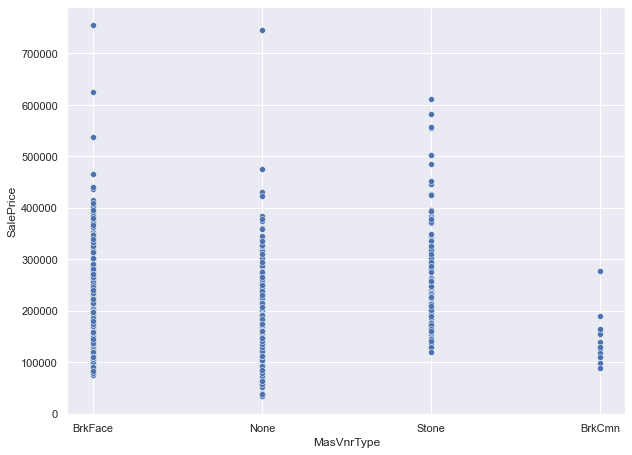

In [53]:
sns.scatterplot(x = 'MasVnrType', y = 'SalePrice', data = df_train)

In [54]:
df_train.ExterQual.value_counts().sort_values(ascending = False).head(20)

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

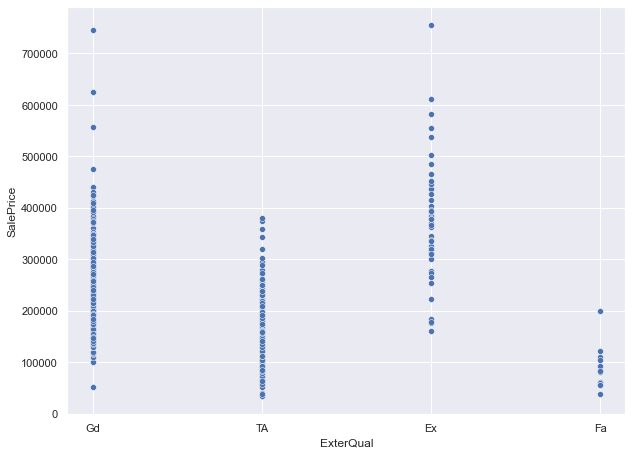

In [55]:
sns.scatterplot(x = 'ExterQual', y = 'SalePrice', data = df_train)

In [56]:
df_train.ExterCond.value_counts().sort_values(ascending = False).head(20)

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

<AxesSubplot:xlabel='ExterCond', ylabel='SalePrice'>

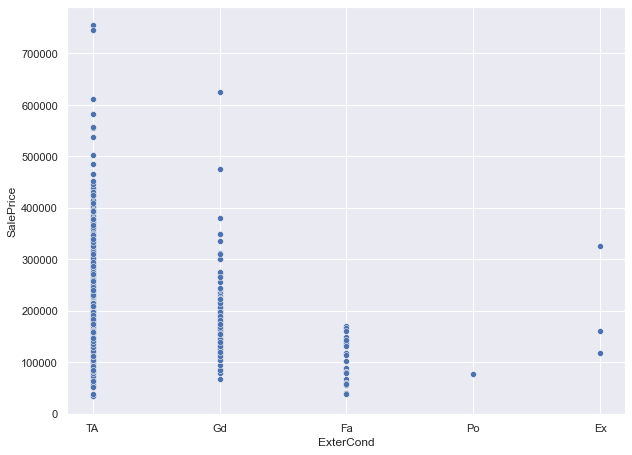

In [57]:
sns.scatterplot(x = 'ExterCond', y = 'SalePrice', data = df_train)

In [58]:
df_train.Foundation.value_counts().sort_values(ascending = False).head(20)

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

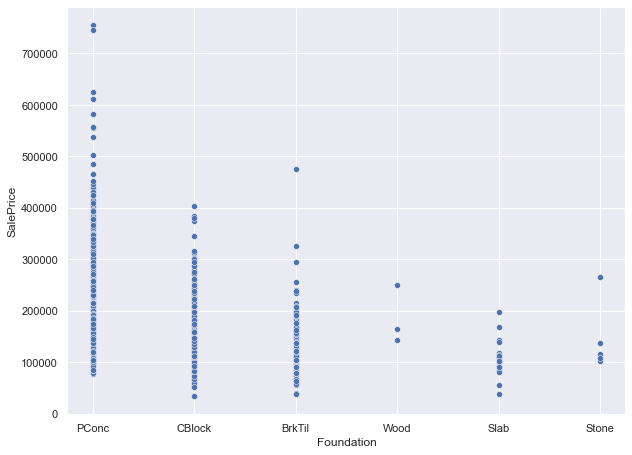

In [59]:
sns.scatterplot(x = 'Foundation', y = 'SalePrice', data = df_train)

In [60]:
df_train.BsmtQual.value_counts().sort_values(ascending = False).head(20)

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

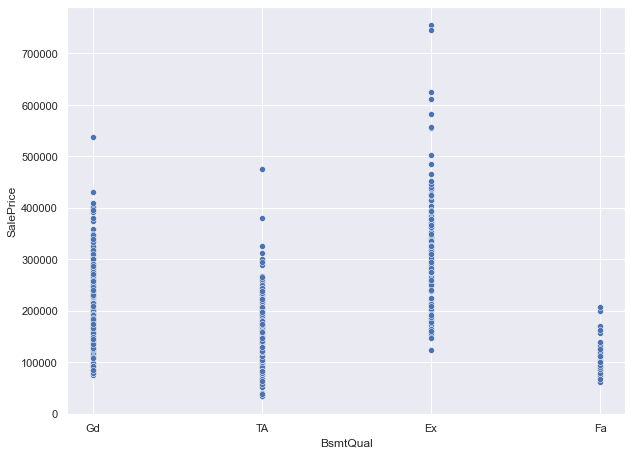

In [61]:
sns.scatterplot(x = 'BsmtQual', y = 'SalePrice', data = df_train)

In [62]:
df_train.BsmtCond.value_counts().sort_values(ascending = False).head(20)

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

<AxesSubplot:xlabel='BsmtCond', ylabel='SalePrice'>

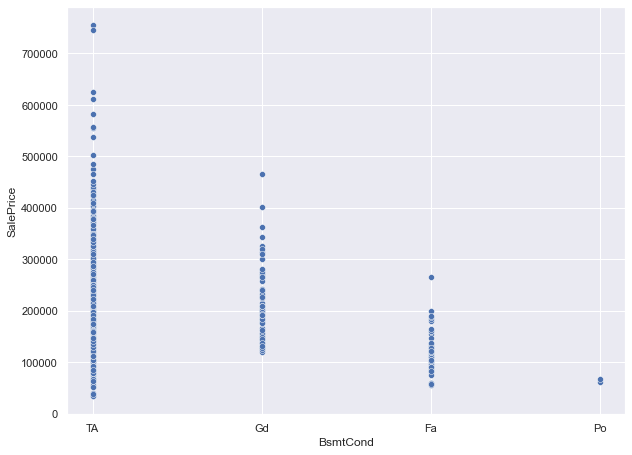

In [63]:
sns.scatterplot(x = 'BsmtCond', y = 'SalePrice', data = df_train)

In [64]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [65]:
df_train.BsmtExposure.value_counts().sort_values(ascending = False).head(20)

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

<AxesSubplot:xlabel='BsmtExposure', ylabel='SalePrice'>

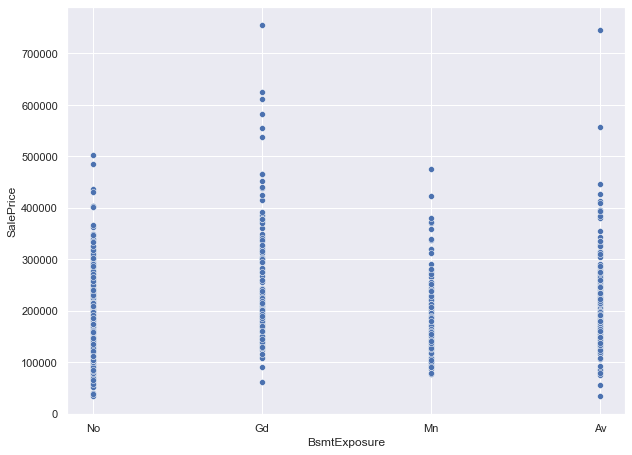

In [66]:
sns.scatterplot(x = 'BsmtExposure', y = 'SalePrice', data = df_train)

In [67]:
df_train.BsmtFinType1.value_counts().sort_values(ascending = False).head(20)

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [68]:
df_train.BsmtFinType2.value_counts().sort_values(ascending = False).head(20)

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [69]:
df_train.Heating.value_counts().sort_values(ascending = False).head(20)

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

<AxesSubplot:xlabel='Heating', ylabel='SalePrice'>

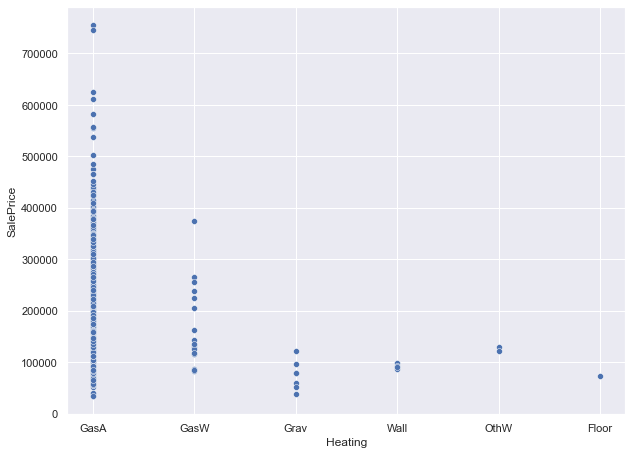

In [70]:
sns.scatterplot(x = 'Heating', y = 'SalePrice', data = df_train)

In [71]:
df_train.HeatingQC.value_counts().sort_values(ascending = False).head(20)

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

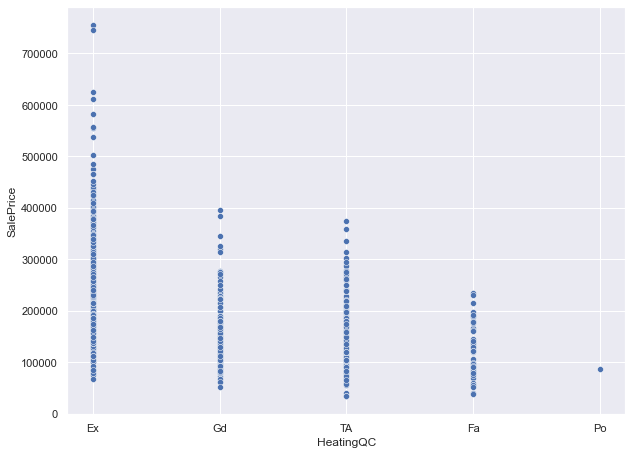

In [72]:
sns.scatterplot(x = 'HeatingQC', y = 'SalePrice', data = df_train)

In [73]:
df_train.CentralAir.value_counts().sort_values(ascending = False).head(20)

Y    1365
N      95
Name: CentralAir, dtype: int64

<AxesSubplot:xlabel='CentralAir', ylabel='SalePrice'>

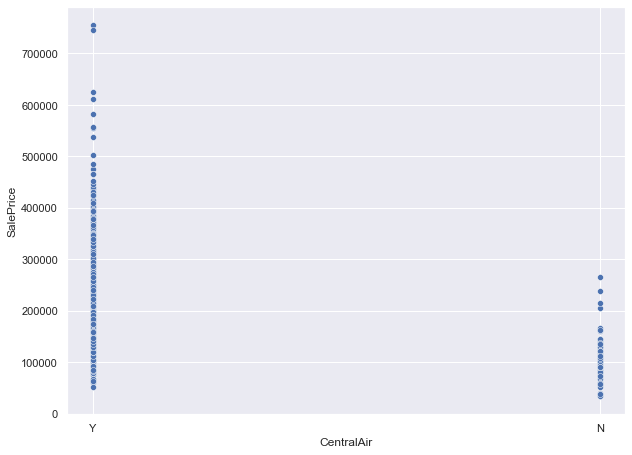

In [74]:
sns.scatterplot(x = 'CentralAir', y = 'SalePrice', data = df_train)

In [75]:
df_train.Electrical.value_counts().sort_values(ascending = False).head(20)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

<AxesSubplot:xlabel='Electrical', ylabel='SalePrice'>

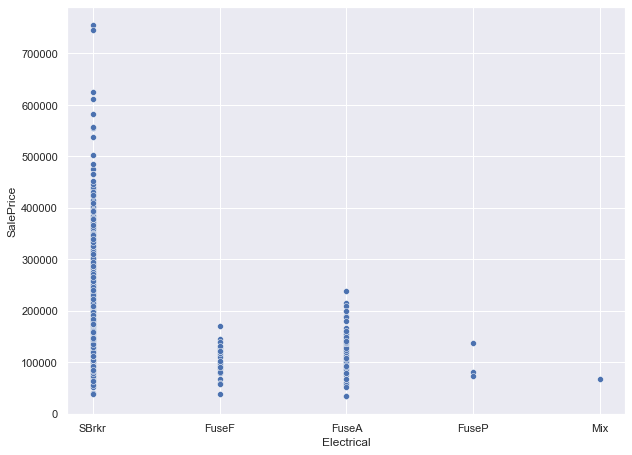

In [76]:
sns.scatterplot(x = 'Electrical', y = 'SalePrice', data = df_train)

In [77]:
df_train.KitchenQual.value_counts().sort_values(ascending = False).head(20)

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

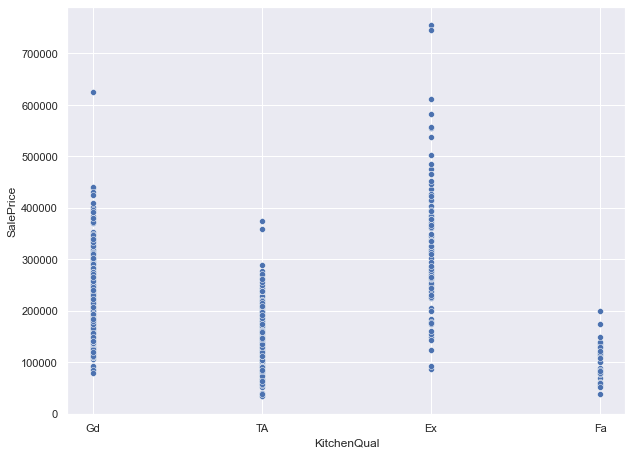

In [78]:
sns.scatterplot(x = 'KitchenQual', y = 'SalePrice', data = df_train)

In [79]:
df_train.Functional.value_counts().sort_values(ascending = False).head(20)

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

<AxesSubplot:xlabel='Functional', ylabel='SalePrice'>

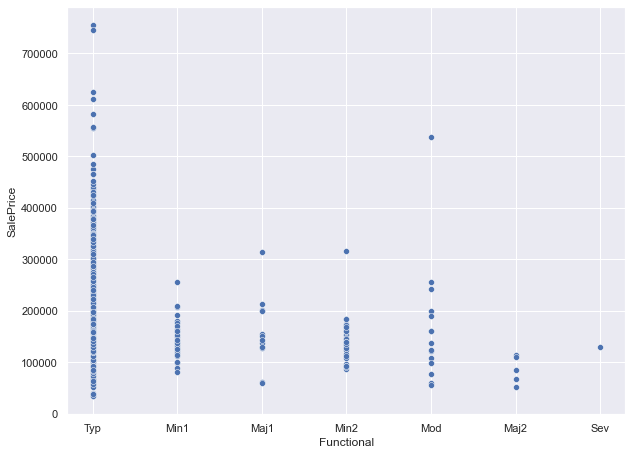

In [80]:
sns.scatterplot(x = 'Functional', y = 'SalePrice', data = df_train)

In [81]:
df_train.FireplaceQu.value_counts().sort_values(ascending = False).head(20)

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

<AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>

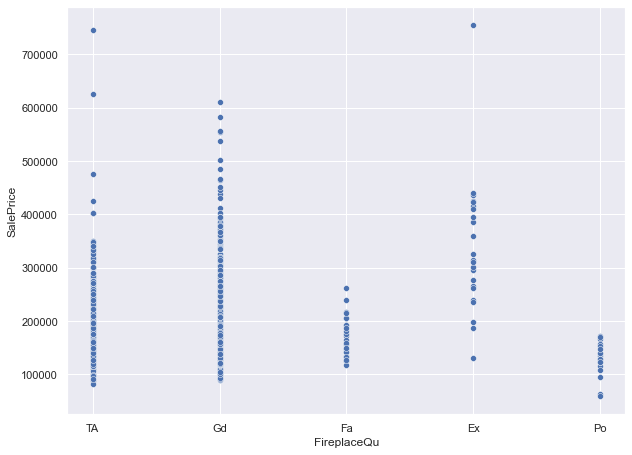

In [82]:
sns.scatterplot(x = 'FireplaceQu', y = 'SalePrice', data = df_train)

In [83]:
df_train.GarageType.value_counts().sort_values(ascending = False).head(20)

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

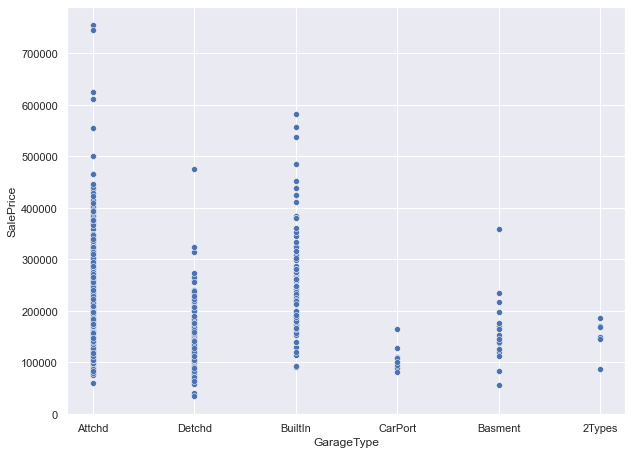

In [84]:
sns.scatterplot(x = 'GarageType', y = 'SalePrice', data = df_train)

In [85]:
df_train.GarageFinish.value_counts().sort_values(ascending = False).head(20)

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

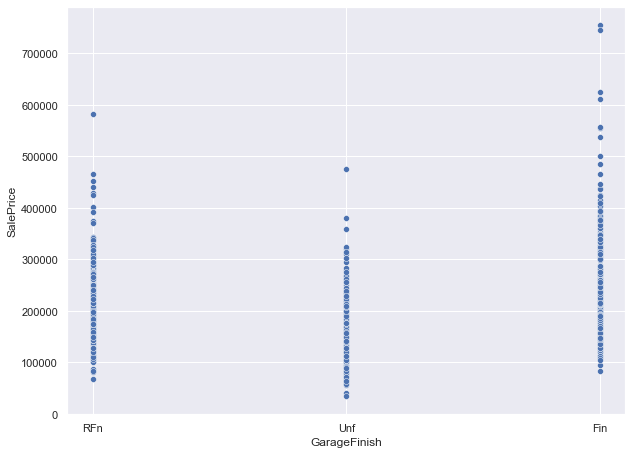

In [86]:
sns.scatterplot(x = 'GarageFinish', y = 'SalePrice', data = df_train)

In [87]:
df_train.GarageQual.value_counts().sort_values(ascending = False).head(20)

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

<AxesSubplot:xlabel='GarageQual', ylabel='SalePrice'>

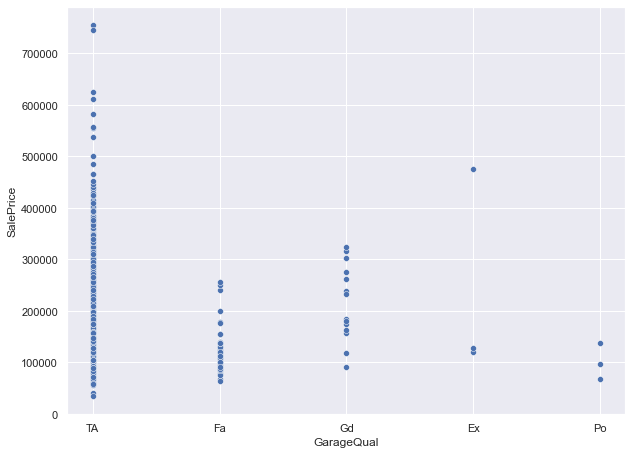

In [88]:
sns.scatterplot(x = 'GarageQual', y = 'SalePrice', data = df_train)

In [89]:
df_train.GarageCond.value_counts().sort_values(ascending = False).head(20)

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

<AxesSubplot:xlabel='GarageCond', ylabel='SalePrice'>

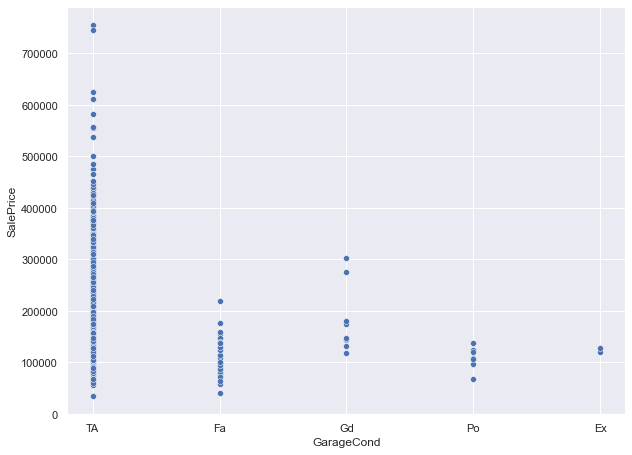

In [90]:
sns.scatterplot(x = 'GarageCond', y = 'SalePrice', data = df_train)

In [91]:
df_train.PavedDrive.value_counts().sort_values(ascending = False).head(20)

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

<AxesSubplot:xlabel='PavedDrive', ylabel='SalePrice'>

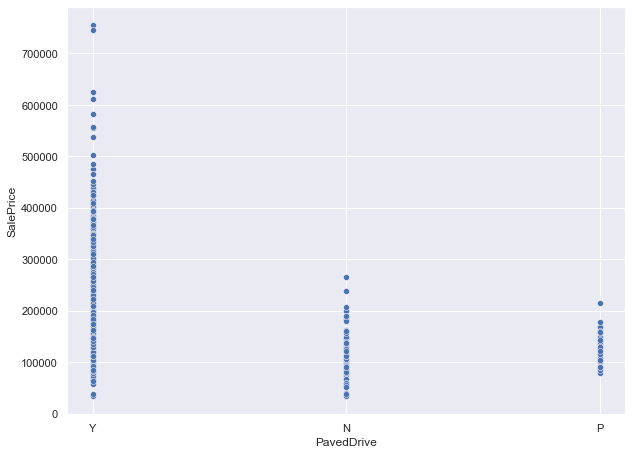

In [92]:
sns.scatterplot(x = 'PavedDrive', y = 'SalePrice', data = df_train)

In [93]:
df_train.PoolQC.value_counts().sort_values(ascending = False).head(20)

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

<AxesSubplot:xlabel='PoolQC', ylabel='SalePrice'>

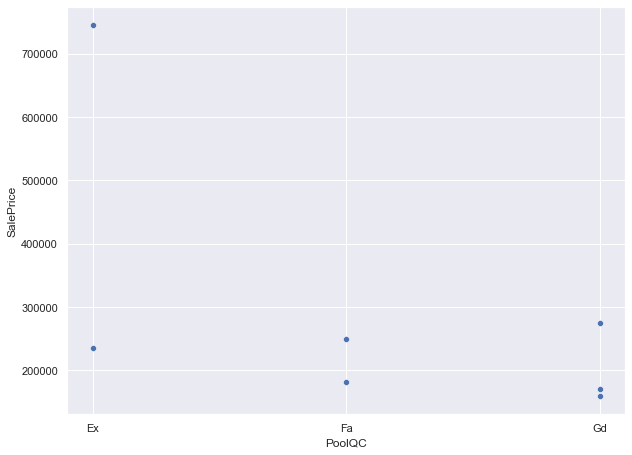

In [94]:
sns.scatterplot(x = 'PoolQC', y = 'SalePrice', data = df_train)

In [95]:
df_train.Fence.value_counts().sort_values(ascending = False).head(20)

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

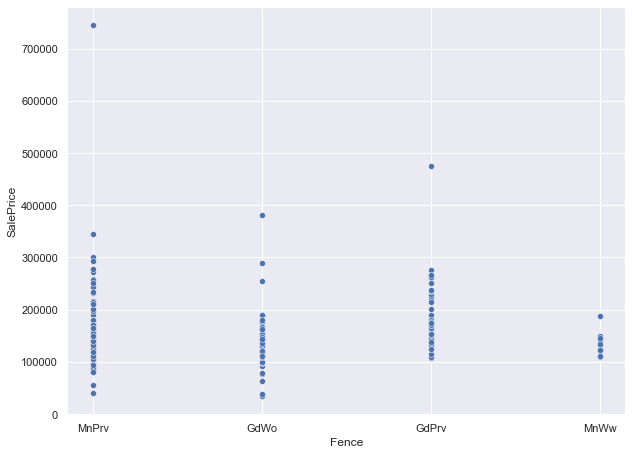

In [96]:
sns.scatterplot(x = 'Fence', y = 'SalePrice', data = df_train)

In [97]:
df_train.MiscFeature.value_counts().sort_values(ascending = False).head(20)

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [98]:
df_train.SaleType.value_counts().sort_values(ascending = False).head(20)

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

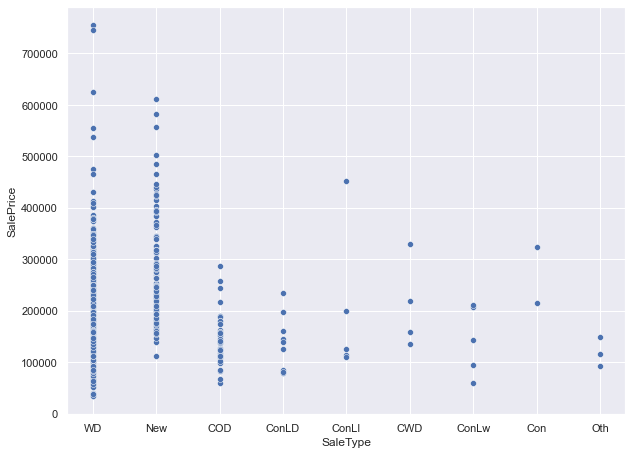

In [99]:
sns.scatterplot(x = 'SaleType', y = 'SalePrice', data = df_train)

In [100]:
df_train.SaleCondition.value_counts().sort_values(ascending = False).head(20)

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

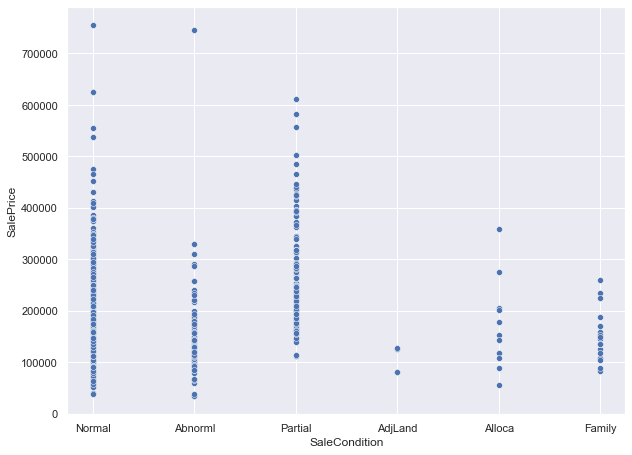

In [101]:
sns.scatterplot(x = 'SaleCondition', y = 'SalePrice', data = df_train)

# Finalized variables
from the above data exploration i have selected some variables that have good impact on sale price

In [102]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [103]:
train_data = df_train.loc(axis = 1)['LotFrontage','Street','LandContour','LandSlope','OverallQual','YearBuilt','YearRemodAdd','MasVnrArea',
                     'BsmtQual','BsmtFinSF1','TotalBsmtSF','HeatingQC','CentralAir','GrLivArea','FullBath',
                     'KitchenQual','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','PoolQC','SalePrice']
train_data.head()

,LotFrontage,Street,LandContour,LandSlope,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtFinSF1,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PoolQC,SalePrice
0,65.0,Pave,Lvl,Gtl,7,2003,2003,196.0,Gd,706,856,Ex,Y,1710,2,Gd,8,0,2003.0,2,548,NaN,208500
1,80.0,Pave,Lvl,Gtl,6,1976,1976,0.0,Gd,978,1262,Ex,Y,1262,2,TA,6,1,1976.0,2,460,NaN,181500
2,68.0,Pave,Lvl,Gtl,7,2001,2002,162.0,Gd,486,920,Ex,Y,1786,2,Gd,6,1,2001.0,2,608,NaN,223500
3,60.0,Pave,Lvl,Gtl,7,1915,1970,0.0,TA,216,756,Gd,Y,1717,1,Gd,7,1,1998.0,3,642,NaN,140000
4,84.0,Pave,Lvl,Gtl,8,2000,2000,350.0,Gd,655,1145,Ex,Y,2198,2,Gd,9,1,2000.0,3,836,NaN,250000


In [104]:
test_data = df_test.loc(axis = 1)['LotFrontage','Street','LandContour','LandSlope','OverallQual','YearBuilt','YearRemodAdd','MasVnrArea',
                     'BsmtQual','BsmtFinSF1','TotalBsmtSF','HeatingQC','CentralAir','GrLivArea','FullBath',
                     'KitchenQual','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','PoolQC']
test_data.head()

,LotFrontage,Street,LandContour,LandSlope,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtFinSF1,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PoolQC
0,80.0,Pave,Lvl,Gtl,5,1961,1961,0.0,TA,468.0,882.0,TA,Y,896,1,TA,5,0,1961.0,1.0,730.0,NaN
1,81.0,Pave,Lvl,Gtl,6,1958,1958,108.0,TA,923.0,1329.0,TA,Y,1329,1,Gd,6,0,1958.0,1.0,312.0,NaN
2,74.0,Pave,Lvl,Gtl,5,1997,1998,0.0,Gd,791.0,928.0,Gd,Y,1629,2,TA,6,1,1997.0,2.0,482.0,NaN
3,78.0,Pave,Lvl,Gtl,6,1998,1998,20.0,TA,602.0,926.0,Ex,Y,1604,2,Gd,7,1,1998.0,2.0,470.0,NaN
4,43.0,Pave,HLS,Gtl,8,1992,1992,0.0,Gd,263.0,1280.0,Ex,Y,1280,2,Gd,5,0,1992.0,2.0,506.0,NaN


In [105]:
train_data.isnull().sum()

LotFrontage      259
Street             0
LandContour        0
LandSlope          0
OverallQual        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtQual          37
BsmtFinSF1         0
TotalBsmtSF        0
HeatingQC          0
CentralAir         0
GrLivArea          0
FullBath           0
KitchenQual        0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
PoolQC          1453
SalePrice          0
dtype: int64

In [106]:
test_data.isnull().sum()

LotFrontage      227
Street             0
LandContour        0
LandSlope          0
OverallQual        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtQual          44
BsmtFinSF1         1
TotalBsmtSF        1
HeatingQC          0
CentralAir         0
GrLivArea          0
FullBath           0
KitchenQual        1
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
PoolQC          1456
dtype: int64

In [107]:
train_data.shape

(1460, 23)

In [108]:
test_data.shape

(1459, 22)

In [109]:
train_data.head()

,LotFrontage,Street,LandContour,LandSlope,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtFinSF1,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PoolQC,SalePrice
0,65.0,Pave,Lvl,Gtl,7,2003,2003,196.0,Gd,706,856,Ex,Y,1710,2,Gd,8,0,2003.0,2,548,NaN,208500
1,80.0,Pave,Lvl,Gtl,6,1976,1976,0.0,Gd,978,1262,Ex,Y,1262,2,TA,6,1,1976.0,2,460,NaN,181500
2,68.0,Pave,Lvl,Gtl,7,2001,2002,162.0,Gd,486,920,Ex,Y,1786,2,Gd,6,1,2001.0,2,608,NaN,223500
3,60.0,Pave,Lvl,Gtl,7,1915,1970,0.0,TA,216,756,Gd,Y,1717,1,Gd,7,1,1998.0,3,642,NaN,140000
4,84.0,Pave,Lvl,Gtl,8,2000,2000,350.0,Gd,655,1145,Ex,Y,2198,2,Gd,9,1,2000.0,3,836,NaN,250000


In [110]:
train_data.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

In [111]:
street = pd.get_dummies(train_data['Street'], drop_first=True)

In [112]:
landcontour = pd.get_dummies(train_data['LandContour'], drop_first=True)

In [113]:
train_data.LandSlope.unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [114]:
landslope = pd.get_dummies(train_data['LandSlope'], drop_first=True)

In [115]:
landslope.value_counts()

Mod  Sev
0    0      1382
1    0        65
0    1        13
dtype: int64

In [116]:
train_data.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [117]:
bsmtqual = pd.get_dummies(train_data['BsmtQual'], drop_first=True)
bsmtqual.head()

,Fa,Gd,TA
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [118]:
train_data.head()

,LotFrontage,Street,LandContour,LandSlope,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtFinSF1,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PoolQC,SalePrice
0,65.0,Pave,Lvl,Gtl,7,2003,2003,196.0,Gd,706,856,Ex,Y,1710,2,Gd,8,0,2003.0,2,548,NaN,208500
1,80.0,Pave,Lvl,Gtl,6,1976,1976,0.0,Gd,978,1262,Ex,Y,1262,2,TA,6,1,1976.0,2,460,NaN,181500
2,68.0,Pave,Lvl,Gtl,7,2001,2002,162.0,Gd,486,920,Ex,Y,1786,2,Gd,6,1,2001.0,2,608,NaN,223500
3,60.0,Pave,Lvl,Gtl,7,1915,1970,0.0,TA,216,756,Gd,Y,1717,1,Gd,7,1,1998.0,3,642,NaN,140000
4,84.0,Pave,Lvl,Gtl,8,2000,2000,350.0,Gd,655,1145,Ex,Y,2198,2,Gd,9,1,2000.0,3,836,NaN,250000


In [119]:
heatingqc = pd.get_dummies(train_data['HeatingQC'], drop_first=True)
centralair = pd.get_dummies(train_data['CentralAir'], drop_first=True)
kitchenqual = pd.get_dummies(train_data['KitchenQual'], drop_first=True)


In [120]:
kitchenqual.head()

,Fa,Gd,TA
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0


In [121]:
test_street = pd.get_dummies(test_data['Street'], drop_first=True)
test_landcontour = pd.get_dummies(test_data['LandContour'], drop_first=True)
test_landslope = pd.get_dummies(test_data['LandSlope'], drop_first=True)
test_bsmtqual = pd.get_dummies(test_data['BsmtQual'], drop_first=True)
test_heatingqc = pd.get_dummies(test_data['HeatingQC'], drop_first=True)
test_centralair = pd.get_dummies(test_data['CentralAir'], drop_first=True)
test_kitchenqual = pd.get_dummies(test_data['KitchenQual'], drop_first=True)

In [122]:
new_train_df = pd.concat([train_data,street,landcontour,landslope,bsmtqual,heatingqc,centralair,kitchenqual], axis = 1)
new_train_df.head(10)

,LotFrontage,Street,LandContour,LandSlope,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtFinSF1,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PoolQC,SalePrice,Pave,HLS,Low,Lvl,Mod,Sev,Fa,Gd,TA,Fa,Gd,Po,TA,Y,Fa,Gd,TA
0,65.0,Pave,Lvl,Gtl,7,2003,2003,196.0,Gd,706,856,Ex,Y,1710,2,Gd,8,0,2003.0,2,548,NaN,208500,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
1,80.0,Pave,Lvl,Gtl,6,1976,1976,0.0,Gd,978,1262,Ex,Y,1262,2,TA,6,1,1976.0,2,460,NaN,181500,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
2,68.0,Pave,Lvl,Gtl,7,2001,2002,162.0,Gd,486,920,Ex,Y,1786,2,Gd,6,1,2001.0,2,608,NaN,223500,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
3,60.0,Pave,Lvl,Gtl,7,1915,1970,0.0,TA,216,756,Gd,Y,1717,1,Gd,7,1,1998.0,3,642,NaN,140000,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0
4,84.0,Pave,Lvl,Gtl,8,2000,2000,350.0,Gd,655,1145,Ex,Y,2198,2,Gd,9,1,2000.0,3,836,NaN,250000,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
5,85.0,Pave,Lvl,Gtl,5,1993,1995,0.0,Gd,732,796,Ex,Y,1362,1,TA,5,0,1993.0,2,480,NaN,143000,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
6,75.0,Pave,Lvl,Gtl,8,2004,2005,186.0,Ex,1369,1686,Ex,Y,1694,2,Gd,7,1,2004.0,2,636,NaN,307000,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
7,NaN,Pave,Lvl,Gtl,7,1973,1973,240.0,Gd,859,1107,Ex,Y,2090,2,TA,7,2,1973.0,2,484,NaN,200000,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
8,51.0,Pave,Lvl,Gtl,7,1931,1950,0.0,TA,0,952,Gd,Y,1774,2,TA,8,2,1931.0,2,468,NaN,129900,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1
9,50.0,Pave,Lvl,Gtl,5,1939,1950,0.0,TA,851,991,Ex,Y,1077,1,TA,5,2,1939.0,1,205,NaN,118000,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1


In [123]:
new_test_df = pd.concat([test_data,test_street,test_landcontour,test_landslope,test_bsmtqual,test_heatingqc,
                         test_centralair,test_kitchenqual], axis = 1)
new_test_df.head(10)

,LotFrontage,Street,LandContour,LandSlope,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtFinSF1,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PoolQC,Pave,HLS,Low,Lvl,Mod,Sev,Fa,Gd,TA,Fa,Gd,Po,TA,Y,Fa,Gd,TA
0,80.0,Pave,Lvl,Gtl,5,1961,1961,0.0,TA,468.0,882.0,TA,Y,896,1,TA,5,0,1961.0,1.0,730.0,NaN,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1
1,81.0,Pave,Lvl,Gtl,6,1958,1958,108.0,TA,923.0,1329.0,TA,Y,1329,1,Gd,6,0,1958.0,1.0,312.0,NaN,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0
2,74.0,Pave,Lvl,Gtl,5,1997,1998,0.0,Gd,791.0,928.0,Gd,Y,1629,2,TA,6,1,1997.0,2.0,482.0,NaN,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
3,78.0,Pave,Lvl,Gtl,6,1998,1998,20.0,TA,602.0,926.0,Ex,Y,1604,2,Gd,7,1,1998.0,2.0,470.0,NaN,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
4,43.0,Pave,HLS,Gtl,8,1992,1992,0.0,Gd,263.0,1280.0,Ex,Y,1280,2,Gd,5,0,1992.0,2.0,506.0,NaN,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
5,75.0,Pave,Lvl,Gtl,6,1993,1994,0.0,Gd,0.0,763.0,Gd,Y,1655,2,TA,7,1,1993.0,2.0,440.0,NaN,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
6,NaN,Pave,Lvl,Gtl,6,1992,2007,0.0,Gd,935.0,1168.0,Ex,Y,1187,2,TA,6,0,1992.0,2.0,420.0,NaN,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
7,63.0,Pave,Lvl,Gtl,6,1998,1998,0.0,Gd,0.0,789.0,Gd,Y,1465,2,TA,7,1,1998.0,2.0,393.0,NaN,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
8,85.0,Pave,Lvl,Gtl,7,1990,1990,0.0,Gd,637.0,1300.0,Gd,Y,1341,1,Gd,5,1,1990.0,2.0,506.0,NaN,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
9,70.0,Pave,Lvl,Gtl,4,1970,1970,0.0,TA,804.0,882.0,TA,Y,882,1,TA,4,0,1970.0,2.0,525.0,NaN,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1


In [124]:
new_train_df.drop(['Street','LandContour','LandSlope','BsmtQual','HeatingQC','CentralAir','KitchenQual'],axis=1,inplace=True)

In [125]:
new_test_df.drop(['Street','LandContour','LandSlope','BsmtQual','HeatingQC','CentralAir','KitchenQual'],axis=1,inplace=True)
new_test_df.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PoolQC,Pave,HLS,Low,Lvl,Mod,Sev,Fa,Gd,TA,Fa,Gd,Po,TA,Y,Fa,Gd,TA
0,80.0,5,1961,1961,0.0,468.0,882.0,896,1,5,0,1961.0,1.0,730.0,NaN,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1
1,81.0,6,1958,1958,108.0,923.0,1329.0,1329,1,6,0,1958.0,1.0,312.0,NaN,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0
2,74.0,5,1997,1998,0.0,791.0,928.0,1629,2,6,1,1997.0,2.0,482.0,NaN,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
3,78.0,6,1998,1998,20.0,602.0,926.0,1604,2,7,1,1998.0,2.0,470.0,NaN,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
4,43.0,8,1992,1992,0.0,263.0,1280.0,1280,2,5,0,1992.0,2.0,506.0,NaN,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [126]:
new_train_df.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PoolQC,SalePrice,Pave,HLS,Low,Lvl,Mod,Sev,Fa,Gd,TA,Fa,Gd,Po,TA,Y,Fa,Gd,TA
0,65.0,7,2003,2003,196.0,706,856,1710,2,8,0,2003.0,2,548,NaN,208500,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
1,80.0,6,1976,1976,0.0,978,1262,1262,2,6,1,1976.0,2,460,NaN,181500,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
2,68.0,7,2001,2002,162.0,486,920,1786,2,6,1,2001.0,2,608,NaN,223500,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
3,60.0,7,1915,1970,0.0,216,756,1717,1,7,1,1998.0,3,642,NaN,140000,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0
4,84.0,8,2000,2000,350.0,655,1145,2198,2,9,1,2000.0,3,836,NaN,250000,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0


In [127]:
new_train_df.isnull().sum()

LotFrontage      259
OverallQual        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
TotalBsmtSF        0
GrLivArea          0
FullBath           0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
PoolQC          1453
SalePrice          0
Pave               0
HLS                0
Low                0
Lvl                0
Mod                0
Sev                0
Fa                 0
Gd                 0
TA                 0
Fa                 0
Gd                 0
Po                 0
TA                 0
Y                  0
Fa                 0
Gd                 0
TA                 0
dtype: int64

In [128]:
new_test_df.isnull().sum()

LotFrontage      227
OverallQual        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
TotalBsmtSF        1
GrLivArea          0
FullBath           0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
PoolQC          1456
Pave               0
HLS                0
Low                0
Lvl                0
Mod                0
Sev                0
Fa                 0
Gd                 0
TA                 0
Fa                 0
Gd                 0
Po                 0
TA                 0
Y                  0
Fa                 0
Gd                 0
TA                 0
dtype: int64

In [129]:
new_train_df.drop('PoolQC', axis=1, inplace=True)
new_train_df.isnull().sum()

LotFrontage     259
OverallQual       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
TotalBsmtSF       0
GrLivArea         0
FullBath          0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
SalePrice         0
Pave              0
HLS               0
Low               0
Lvl               0
Mod               0
Sev               0
Fa                0
Gd                0
TA                0
Fa                0
Gd                0
Po                0
TA                0
Y                 0
Fa                0
Gd                0
TA                0
dtype: int64

In [130]:
new_test_df.drop('PoolQC', axis=1, inplace=True)

In [131]:
new_train_df['LotFrontage'] = new_train_df['LotFrontage'].fillna(value = new_train_df['LotFrontage'].mean())

In [132]:
new_test_df['LotFrontage'] = new_test_df['LotFrontage'].fillna(value = new_test_df['LotFrontage'].mean())

In [133]:
new_train_df['GarageYrBlt'] = new_train_df['GarageYrBlt'].fillna(value = new_train_df['GarageYrBlt'].mean())

In [134]:
new_test_df['GarageYrBlt'] = new_test_df['GarageYrBlt'].fillna(value = new_test_df['GarageYrBlt'].mean())

In [135]:
new_train_df.MasVnrArea

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [136]:
new_train_df['MasVnrArea'] = new_train_df['MasVnrArea'].fillna(0)
new_train_df.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice,Pave,HLS,Low,Lvl,Mod,Sev,Fa,Gd,TA,Fa,Gd,Po,TA,Y,Fa,Gd,TA
0,65.0,7,2003,2003,196.0,706,856,1710,2,8,0,2003.0,2,548,208500,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
1,80.0,6,1976,1976,0.0,978,1262,1262,2,6,1,1976.0,2,460,181500,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
2,68.0,7,2001,2002,162.0,486,920,1786,2,6,1,2001.0,2,608,223500,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
3,60.0,7,1915,1970,0.0,216,756,1717,1,7,1,1998.0,3,642,140000,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0
4,84.0,8,2000,2000,350.0,655,1145,2198,2,9,1,2000.0,3,836,250000,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0


In [137]:
new_test_df['MasVnrArea'] = new_test_df['MasVnrArea'].fillna(0)
new_test_df.isnull().sum()

LotFrontage     0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      1
TotalBsmtSF     1
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      1
GarageArea      1
Pave            0
HLS             0
Low             0
Lvl             0
Mod             0
Sev             0
Fa              0
Gd              0
TA              0
Fa              0
Gd              0
Po              0
TA              0
Y               0
Fa              0
Gd              0
TA              0
dtype: int64

In [138]:
new_test_df['BsmtFinSF1'] = new_test_df['BsmtFinSF1'].fillna(value = new_test_df['BsmtFinSF1'].mean())
new_test_df.isnull().sum()

LotFrontage     0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
TotalBsmtSF     1
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      1
GarageArea      1
Pave            0
HLS             0
Low             0
Lvl             0
Mod             0
Sev             0
Fa              0
Gd              0
TA              0
Fa              0
Gd              0
Po              0
TA              0
Y               0
Fa              0
Gd              0
TA              0
dtype: int64

In [139]:
new_test_df['TotalBsmtSF'] = new_test_df['TotalBsmtSF'].fillna(value = new_test_df['TotalBsmtSF'].mean())


In [140]:

new_test_df['GarageArea'] = new_test_df['GarageArea'].fillna(value = new_test_df['GarageArea'].mean())


In [141]:
new_test_df['GarageCars'] = new_test_df['GarageCars'].fillna(0)

In [142]:
new_test_df.isnull().sum()

LotFrontage     0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
TotalBsmtSF     0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
Pave            0
HLS             0
Low             0
Lvl             0
Mod             0
Sev             0
Fa              0
Gd              0
TA              0
Fa              0
Gd              0
Po              0
TA              0
Y               0
Fa              0
Gd              0
TA              0
dtype: int64

In [143]:
from sklearn.preprocessing import StandardScaler
columns = new_train_df.drop('SalePrice', axis=1).columns
scaler = StandardScaler()
X_train_std = scaler.fit_transform(new_train_df.drop('SalePrice',axis=1))
X_train_std = pd.DataFrame(X_train_std, columns = columns)
X_train_std.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,Pave,HLS,Low,Lvl,Mod,Sev,Fa,Gd,TA,Fa,Gd,Po,TA,Y,Fa,Gd,TA
0,-0.229372,0.651479,1.050994,0.878668,0.514104,0.575425,-0.459303,0.370333,0.789741,0.912210,-0.951226,1.021157,0.311725,0.351000,0.064238,-0.188311,-0.159,0.337126,-0.215859,-0.094785,-0.156721,1.167244,-0.894565,-0.186352,-0.444638,-0.02618,-0.643994,0.263813,-0.165667,1.221257,-1.006873
1,0.451936,-0.071836,0.156734,-0.429577,-0.570750,1.171992,0.466465,-0.482512,0.789741,-0.318683,0.600495,-0.104483,0.311725,-0.060731,0.064238,-0.188311,-0.159,0.337126,-0.215859,-0.094785,-0.156721,1.167244,-0.894565,-0.186352,-0.444638,-0.02618,-0.643994,0.263813,-0.165667,-0.818829,0.993174
2,-0.093110,0.651479,0.984752,0.830215,0.325915,0.092907,-0.313369,0.515013,0.789741,-0.318683,0.600495,0.937776,0.311725,0.631726,0.064238,-0.188311,-0.159,0.337126,-0.215859,-0.094785,-0.156721,1.167244,-0.894565,-0.186352,-0.444638,-0.02618,-0.643994,0.263813,-0.165667,1.221257,-1.006873
3,-0.456474,0.651479,-1.863632,-0.720298,-0.570750,-0.499274,-0.687324,0.383659,-1.026041,0.296763,0.600495,0.812705,1.650307,0.790804,0.064238,-0.188311,-0.159,0.337126,-0.215859,-0.094785,-0.156721,-0.856719,1.117862,-0.186352,2.249020,-0.02618,-0.643994,0.263813,-0.165667,1.221257,-1.006873
4,0.633618,1.374795,0.951632,0.733308,1.366489,0.463568,0.199680,1.299326,0.789741,1.527656,0.600495,0.896086,1.650307,1.698485,0.064238,-0.188311,-0.159,0.337126,-0.215859,-0.094785,-0.156721,1.167244,-0.894565,-0.186352,-0.444638,-0.02618,-0.643994,0.263813,-0.165667,1.221257,-1.006873


In [144]:
test_columns = new_test_df.columns
scaler = StandardScaler()
X_test_std = scaler.fit_transform(new_test_df)
X_test_std = pd.DataFrame(X_test_std, columns = test_columns)
X_test_std.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,Pave,HLS,Low,Lvl,Mod,Sev,Fa,Gd,TA,Fa,Gd,Po,TA,Y,Fa,Gd,TA
0,0.555587,-0.751101,-0.340945,-1.072885,-0.563316,0.063295,-0.370808,-1.215588,-1.028720,-0.918335,-0.898055,-0.650488,-0.984704,1.185945,0.06426,-0.224490,-0.129324,0.335992,-0.207094,-0.045392,-0.194154,-0.825152,1.140729,-0.174262,-0.435946,-0.03705,1.549494,0.272716,-0.147339,-0.794979,0.962987
1,0.604239,-0.054877,-0.439695,-1.214908,0.047057,1.063392,0.639144,-0.323539,-1.028720,-0.255371,-0.898055,-0.767194,-0.984704,-0.741213,0.06426,-0.224490,-0.129324,0.335992,-0.207094,-0.045392,-0.194154,-0.825152,1.140729,-0.174262,-0.435946,-0.03705,1.549494,0.272716,-0.147339,1.257895,-1.038435
2,0.263676,-0.751101,0.844059,0.678742,-0.563316,0.773254,-0.266876,0.294508,0.773083,-0.255371,0.647066,0.749983,0.302646,0.042559,0.06426,-0.224490,-0.129324,0.335992,-0.207094,-0.045392,-0.194154,1.211898,-0.876633,-0.174262,2.293862,-0.03705,-0.645372,0.272716,-0.147339,-0.794979,0.962987
3,0.458284,-0.054877,0.876976,0.678742,-0.450284,0.357829,-0.271395,0.243004,0.773083,0.407593,0.647066,0.788885,0.302646,-0.012766,0.06426,-0.224490,-0.129324,0.335992,-0.207094,-0.045392,-0.194154,-0.825152,1.140729,-0.174262,-0.435946,-0.03705,-0.645372,0.272716,-0.147339,1.257895,-1.038435
4,-1.244533,1.337571,0.679475,0.394694,-0.563316,-0.387298,0.528434,-0.424487,0.773083,-0.918335,-0.898055,0.555473,0.302646,0.153210,0.06426,4.454532,-0.129324,-2.976257,-0.207094,-0.045392,-0.194154,1.211898,-0.876633,-0.174262,-0.435946,-0.03705,-0.645372,0.272716,-0.147339,1.257895,-1.038435


In [145]:
X_train_std['SalePrice'] = new_train_df['SalePrice']
X_train_std.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,Pave,HLS,Low,Lvl,Mod,Sev,Fa,Gd,TA,Fa,Gd,Po,TA,Y,Fa,Gd,TA,SalePrice
0,-0.229372,0.651479,1.050994,0.878668,0.514104,0.575425,-0.459303,0.370333,0.789741,0.912210,-0.951226,1.021157,0.311725,0.351000,0.064238,-0.188311,-0.159,0.337126,-0.215859,-0.094785,-0.156721,1.167244,-0.894565,-0.186352,-0.444638,-0.02618,-0.643994,0.263813,-0.165667,1.221257,-1.006873,208500
1,0.451936,-0.071836,0.156734,-0.429577,-0.570750,1.171992,0.466465,-0.482512,0.789741,-0.318683,0.600495,-0.104483,0.311725,-0.060731,0.064238,-0.188311,-0.159,0.337126,-0.215859,-0.094785,-0.156721,1.167244,-0.894565,-0.186352,-0.444638,-0.02618,-0.643994,0.263813,-0.165667,-0.818829,0.993174,181500
2,-0.093110,0.651479,0.984752,0.830215,0.325915,0.092907,-0.313369,0.515013,0.789741,-0.318683,0.600495,0.937776,0.311725,0.631726,0.064238,-0.188311,-0.159,0.337126,-0.215859,-0.094785,-0.156721,1.167244,-0.894565,-0.186352,-0.444638,-0.02618,-0.643994,0.263813,-0.165667,1.221257,-1.006873,223500
3,-0.456474,0.651479,-1.863632,-0.720298,-0.570750,-0.499274,-0.687324,0.383659,-1.026041,0.296763,0.600495,0.812705,1.650307,0.790804,0.064238,-0.188311,-0.159,0.337126,-0.215859,-0.094785,-0.156721,-0.856719,1.117862,-0.186352,2.249020,-0.02618,-0.643994,0.263813,-0.165667,1.221257,-1.006873,140000
4,0.633618,1.374795,0.951632,0.733308,1.366489,0.463568,0.199680,1.299326,0.789741,1.527656,0.600495,0.896086,1.650307,1.698485,0.064238,-0.188311,-0.159,0.337126,-0.215859,-0.094785,-0.156721,1.167244,-0.894565,-0.186352,-0.444638,-0.02618,-0.643994,0.263813,-0.165667,1.221257,-1.006873,250000


In [146]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train_std.drop('SalePrice', axis=1), X_train_std['SalePrice'], test_size = 0.2)

In [147]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [148]:
y_pred = LR.predict(X_test)
y_pred

array([193419.05855402, 181759.83756924, 181476.21640187, 236961.35071563,
       232193.19890863, 191165.09437682, 128759.58930314, 180216.86800718,
       230358.96292522, 128016.01981148, 170366.9715441 ,  72315.48851287,
       166516.11387014, 186563.34057542, 182575.48461127, 305257.75450332,
       276507.51161598, 269087.50181746, 149960.76771411, 376070.75506048,
        79116.82596719, 277323.93534683, 200132.30118881, 201638.54033549,
       163902.84638026, 193353.08525425, 328027.21548465, 237768.51592132,
       115620.96394315,  85704.23738685, 159689.7317716 , 122117.02643631,
       175565.09135812, 111362.23690292, 144113.78545981, 167839.24367135,
       231325.35556406,  16646.67442264, 126589.25089846, 116017.41333183,
       139114.75729508, 247842.84209404,  96606.02948027, 234490.96757769,
       189208.45789496, 110286.02295068, 167309.63799717, 160539.57949264,
       211430.35961094, 184999.77813487, 187831.30891775, 194258.8720568 ,
       209535.07251155,  

In [149]:
y_test

684     221000
186     173000
895     140000
1300    225000
1374    250000
103     198900
376     148000
101     178000
792     269790
500     113000
913     145000
696      89000
201     171500
657     149000
974     167500
423     315000
765     264132
1205    271900
901     153000
481     374000
264      73000
683     285000
1019    213490
1099    157000
203     149000
988     195000
45      319900
941     214000
1392    123000
1404    105000
354     140000
996     136500
1040    155000
887     135500
1047    145000
573     170000
903     240000
916      35311
54      130000
77      127000
1229    127000
621     240000
872     116000
255     230000
662     110000
713     129000
836     153500
962     155000
1157    230000
205     180500
518     211000
739     190000
335     228950
812      55993
1261    128900
454     188000
597     194201
84      168500
13      279500
221     200000
276     201000
561     170000
247     140000
1342    228500
138     230000
222     179900
1406    13

In [150]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

21150.595537196976

In [151]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6313024998776475

In [152]:
Ids = pd.read_csv('C:/Users/KOUSHA/Desktop/data/House Price Prediction dataset/test.csv')[['Id']].values
test_pred = LR.predict(X_test_std)

In [153]:
test_pred.shape

(1459,)

In [154]:
df = {'Id': Ids.ravel(), 'SalePrice': test_pred}
df_predictions = pd.DataFrame(df).set_index(['Id'])
df_predictions.head(10)

,SalePrice
Id,
1461,113987.453237
1462,164759.079798
1463,176540.496536
1464,192392.728910
1465,196022.036881
1466,170709.596905
1467,170557.542908
1468,160205.583678
1469,202001.089531


In [155]:
#df_predictions.to_csv("C:/Users/KOUSHA/Desktop/data/House Price Prediction dataset/Predictions_27-12-20.csv")

In [156]:
X_train.shape

(1168, 31)

In [157]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)

train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.8556981790403259
test score:  0.6313067166394755
number of features used:  31


In [158]:
test_pred_lasso = lasso.predict(X_test_std)
df_lasso = {'Id': Ids.ravel(), 'SalePrice': test_pred_lasso}
df_predictions_lasso = pd.DataFrame(df_lasso).set_index(['Id'])
df_predictions_lasso.head(10)

,SalePrice
Id,
1461,113990.161581
1462,164758.039525
1463,176545.465361
1464,192396.023414
1465,196029.332835
1466,170713.784740
1467,170562.113516
1468,160210.371555
1469,202001.636200


In [159]:
#df_predictions_lasso.to_csv("C:/Users/KOUSHA/Desktop/data/House Price Prediction dataset/Predictions_lasso.csv")

In [160]:
lasso01 = Lasso(alpha=0.01, max_iter=10e5)
lasso01.fit(X_train,y_train)
train_score01=lasso01.score(X_train,y_train)
test_score01=lasso01.score(X_test,y_test)
coeff_used01 = np.sum(lasso01.coef_!=0)

In [161]:
print("training score for alpha=0.01:", train_score01) 
print("test score for alpha =0.01: ", test_score01)
print("number of features used: for alpha =0.01:", coeff_used01)

training score for alpha=0.01: 0.8556981879685841
test score for alpha =0.01:  0.6313025421282896
number of features used: for alpha =0.01: 31


In [162]:
test_pred_lasso01 = lasso01.predict(X_test_std)
df_lasso01 = {'Id': Ids.ravel(), 'SalePrice': test_pred_lasso01}
df_predictions_lasso01 = pd.DataFrame(df_lasso01).set_index(['Id'])
df_predictions_lasso01.head(10)

,SalePrice
Id,
1461,113987.480289
1462,164759.069424
1463,176540.546158
1464,192392.761812
1465,196022.109869
1466,170709.638721
1467,170557.588592
1468,160205.631490
1469,202001.095023


In [163]:
#df_predictions_lasso01.to_csv("C:/Users/KOUSHA/Desktop/data/House Price Prediction dataset/Predictions_lasso01.csv")

In [164]:
from sklearn.svm import SVR
svm_regressor = SVR(kernel='rbf')
svm_regressor.fit(X_train,y_train)

SVR()

In [165]:
test_pred_svr = svm_regressor.predict(X_test_std)
df_svr = {'Id': Ids.ravel(), 'SalePrice': test_pred_svr}
df_predictions_svr = pd.DataFrame(df_svr).set_index(['Id'])
df_predictions_svr.head(10)

,SalePrice
Id,
1461,162107.974625
1462,162175.262863
1463,162292.022683
1464,162322.931077
1465,162284.237848
1466,162295.416208
1467,162290.334982
1468,162291.776336
1469,162318.246257


In [166]:
#df_predictions_svr.to_csv("C:/Users/KOUSHA/Desktop/data/House Price Prediction dataset/Predictions_svr.csv")

In [167]:
from sklearn.tree import DecisionTreeRegressor
DT_regressor = DecisionTreeRegressor(random_state = 0)
DT_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [168]:
test_pred_DT = DT_regressor.predict(X_test_std)
df_DT = {'Id': Ids.ravel(), 'SalePrice': test_pred_DT}
df_predictions_DT = pd.DataFrame(df_DT).set_index(['Id'])
df_predictions_DT.head(10)

,SalePrice
Id,
1461,100000.0
1462,167500.0
1463,188000.0
1464,181900.0
1465,180000.0
1466,181000.0
1467,181000.0
1468,169000.0
1469,184000.0


In [169]:
#df_predictions_DT.to_csv("C:/Users/KOUSHA/Desktop/data/House Price Prediction dataset/Predictions_DT.csv")

In [170]:
from sklearn.ensemble import RandomForestRegressor
RF_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
RF_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [171]:
test_pred_RF = RF_regressor.predict(X_test_std)
df_RF = {'Id': Ids.ravel(), 'SalePrice': test_pred_RF}
df_predictions_RF = pd.DataFrame(df_RF).set_index(['Id'])
df_predictions_RF.head(10)

,SalePrice
Id,
1461,129980.0
1462,167525.0
1463,181300.0
1464,190100.0
1465,200640.0
1466,181450.0
1467,166770.0
1468,176320.0
1469,184135.0


In [172]:
#df_predictions_RF.to_csv("C:/Users/KOUSHA/Desktop/data/House Price Prediction dataset/Predictions_RF.csv")